In [1]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style
import string
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
data=pd.read_excel(r"C:\Users\Dell\Desktop\Learnbay\ML Projects\Manufacturing_Project\data dictionary.xlsx")

In [3]:
data

,Attribute,Description
0,Name,The brand and model of the car
1,Location,The location in which the car is being sold or...
2,Year,The year or edition of the model
3,Kilometers_Driven,The total kilometers driven in the car by the ...
4,Fuel_Type,The type of fuel used by the car
5,Transmission,The type of transmission used by the car
6,Owner_Type,"Whether the ownership is Firsthand, Second han..."
7,Mileage,The standard mileage offered by the car compan...
8,Engine,The displacement volume of the engine in cc
9,Power,The maximum power of the engine in bhp


In [4]:
traindata=pd.read_csv(r"C:\Users\Dell\Desktop\Learnbay\ML Projects\Manufacturing_Project\train.csv")

testdata=pd.read_csv(r"C:\Users\Dell\Desktop\Learnbay\ML Projects\Manufacturing_Project\test.csv")

In [5]:
traindata.head(3)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50


In [6]:
testdata.head(3)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh


# EDA

In [7]:
traindata=traindata.iloc[:,1:]
testdata=testdata.iloc[:,1:]

In [8]:
traindata.head(4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00


In [9]:
testdata.head(4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN


In [10]:
original_taindata=traindata.copy()

In [11]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [12]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
 11  New_Price          182 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


In [13]:
unique_counts=[]
for col in traindata.columns:
    unique_counts.append((col,traindata[col].nunique()))
unique_counts=sorted(unique_counts,key=lambda x:x[1],reverse=True)

print("Unique values in the fields are:")


for col, val in unique_counts:
    print(f"{col} : {val}")
    
    

Unique values in the fields are:
Kilometers_Driven : 3093
Name : 1876
Price : 1373
New_Price : 540
Mileage : 442
Power : 372
Engine : 146
Year : 22
Location : 11
Seats : 9
Fuel_Type : 5
Owner_Type : 4
Transmission : 2


In [14]:
categoricals=[]
numericals=[]

for col, val in unique_counts:
    if val<23:
        categoricals.append(col)
    else:
        numericals.append(col)
        
    

In [15]:
categoricals

['Year', 'Location', 'Seats', 'Fuel_Type', 'Owner_Type', 'Transmission']

In [16]:
numericals

['Kilometers_Driven',
 'Name',
 'Price',
 'New_Price',
 'Mileage',
 'Power',
 'Engine']

In [17]:
traindata.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [18]:
traindata.duplicated().sum()

0

In [19]:
testdata.duplicated().sum()

1

In [20]:
testdata=testdata.drop_duplicates()

# Missing Values

<Axes: >

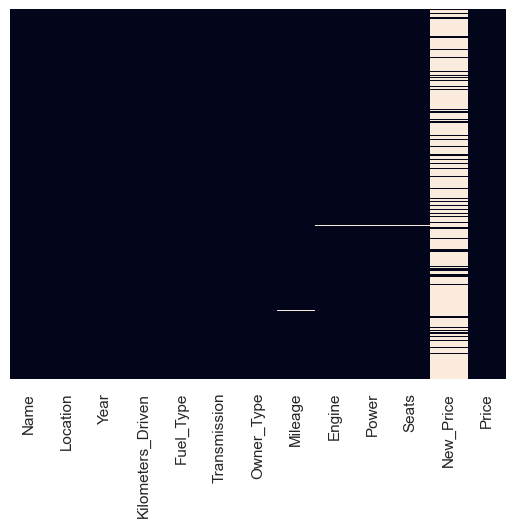

In [21]:
sns.heatmap(traindata.isnull(),yticklabels=False,cbar=False,)

In [22]:
def analyse_col(data):
    if data.dtype=="object":
        keywds=data.str.findall("[a-zA-Z]+",)
        keywds=[x[0] for x in keywds if x is not np.nan]
        return set(keywds)

def getbrand(data):
    return data.split()[0]

def getmodel(data):
    return data.split()[1]

In [23]:
traindata.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [24]:
traindata["Brand"]=traindata["Name"].apply(getbrand)

In [25]:
traindata["Model"]=traindata["Name"].apply(getmodel)

In [26]:
for i in traindata.columns:
    print(f"texts in column '{i}': {analyse_col(traindata[i])}\n")

texts in column 'Name': {'Skoda', 'Ambassador', 'Lamborghini', 'Volkswagen', 'Tata', 'Mini', 'Jeep', 'Isuzu', 'Mercedes', 'Volvo', 'Porsche', 'Force', 'Smart', 'Toyota', 'Chevrolet', 'Renault', 'Ford', 'Audi', 'Hyundai', 'Maruti', 'ISUZU', 'Datsun', 'Fiat', 'Mahindra', 'Jaguar', 'Bentley', 'Nissan', 'Mitsubishi', 'Land', 'Honda', 'BMW'}

texts in column 'Location': {'Pune', 'Delhi', 'Chennai', 'Kochi', 'Jaipur', 'Mumbai', 'Hyderabad', 'Bangalore', 'Coimbatore', 'Ahmedabad', 'Kolkata'}

texts in column 'Year': None

texts in column 'Kilometers_Driven': None

texts in column 'Fuel_Type': {'CNG', 'Electric', 'Diesel', 'LPG', 'Petrol'}

texts in column 'Transmission': {'Automatic', 'Manual'}

texts in column 'Owner_Type': {'Second', 'Third', 'First', 'Fourth'}

texts in column 'Mileage': {'km', 'kmpl'}

texts in column 'Engine': {'CC'}

texts in column 'Power': {'bhp', 'null'}

texts in column 'Seats': None

texts in column 'New_Price': {'Lakh', 'Cr'}

texts in column 'Price': None

texts 

IndexError: list index out of range

In [29]:
analyse_col(traindata["Mileage"])

{'km', 'kmpl'}

In [30]:
analyse_col(traindata["Power"])

{'bhp', 'null'}

In [31]:
analyse_col(traindata["Engine"])

{'CC'}

In [32]:
analyse_col(traindata["New_Price"])

{'Cr', 'Lakh'}

In [33]:
def sanprice(s):
    if type(s)==str:
        s=s.lower()
        if "lakh" in s:
            s=s.strip("lakh")
            s=float(s)
        elif "cr" in s:
            s=s.strip("cr")
            s=float(s)*100
    return s

In [34]:
traindata["New_Price1"]=traindata["New_Price"].apply(sanprice)

In [35]:
analyse_col(traindata["New_Price1"])

In [36]:
def sanmil(s):
    if type(s)==str:
        s=s.lower()
        if "kmpl" in s:
            s=s.strip("kmpl")
        if "km/kg" in s:
            s=s.strip('km/kg')
            s=float(s)*1.8
    return s

In [37]:
traindata["Mileage1"]=traindata["Mileage"].apply(sanmil)

In [38]:
traindata.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,New_Price1,Mileage1
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon,NaN,47.88
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Creta,NaN,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Jazz,8.61,18.2


In [39]:
traindata.Year=traindata.Year.astype("str")

In [40]:
traindata.Mileage1=traindata.Mileage1.astype("float")

In [41]:
traindata.Engine=traindata.Engine.str.strip("CC").astype("float")

In [42]:
traindata.Power=traindata.Power.str.strip("bhp")
traindata.Power=pd.to_numeric(traindata.Power,errors="coerce")

In [43]:
traindata.drop(["New_Price","Mileage"], axis=1, inplace=True)

In [44]:
traindata.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Brand,Model,New_Price1,Mileage1
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998.0,58.16,5.0,1.75,Maruti,Wagon,NaN,47.88


In [45]:
traindata.rename(columns={"Mileage1":"Mileage","New_Price1":"New_Price"}, inplace=True)

In [46]:
traindata.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Brand,Model,New_Price,Mileage
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998.0,58.16,5.0,1.75,Maruti,Wagon,NaN,47.88


In [47]:
traindata.Seats=traindata.Seats.astype("category")

In [48]:
traindata.drop(columns=["Name"], inplace=True)

In [49]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6019 non-null   object  
 1   Year               6019 non-null   object  
 2   Kilometers_Driven  6019 non-null   int64   
 3   Fuel_Type          6019 non-null   object  
 4   Transmission       6019 non-null   object  
 5   Owner_Type         6019 non-null   object  
 6   Engine             5983 non-null   float64 
 7   Power              5876 non-null   float64 
 8   Seats              5977 non-null   category
 9   Price              6019 non-null   float64 
 10  Brand              6019 non-null   object  
 11  Model              6019 non-null   object  
 12  New_Price          824 non-null    float64 
 13  Mileage            6017 non-null   float64 
dtypes: category(1), float64(5), int64(1), object(7)
memory usage: 617.7+ KB


In [50]:
catcol=traindata.select_dtypes(include=["object","category"]).columns
catcol

Index(['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats',
       'Brand', 'Model'],
      dtype='object')

In [51]:
numcol=traindata.select_dtypes(include=["int64","float64"]).columns
numcol

Index(['Kilometers_Driven', 'Engine', 'Power', 'Price', 'New_Price',
       'Mileage'],
      dtype='object')

In [52]:
for i in catcol:
    print(f'Unique values in "{i}": \n {traindata[i].unique()}\n')

Unique values in "Location": 
 ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']

Unique values in "Year": 
 ['2010' '2015' '2011' '2012' '2013' '2016' '2018' '2014' '2017' '2007'
 '2009' '2008' '2019' '2006' '2005' '2004' '2002' '2000' '2003' '1999'
 '2001' '1998']

Unique values in "Fuel_Type": 
 ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']

Unique values in "Transmission": 
 ['Manual' 'Automatic']

Unique values in "Owner_Type": 
 ['First' 'Second' 'Fourth & Above' 'Third']

Unique values in "Seats": 
 [5.0, 7.0, 8.0, 4.0, 6.0, 2.0, NaN, 10.0, 9.0, 0.0]
Categories (9, float64): [0.0, 2.0, 4.0, 5.0, ..., 7.0, 8.0, 9.0, 10.0]

Unique values in "Brand": 
 ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentle

In [53]:
traindata=traindata.drop(traindata[traindata.Seats==0].index)

In [54]:
traindata.head(1)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Brand,Model,New_Price,Mileage
0,Mumbai,2010,72000,CNG,Manual,First,998.0,58.16,5.0,1.75,Maruti,Wagon,NaN,47.88


In [55]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6018 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6018 non-null   object  
 1   Year               6018 non-null   object  
 2   Kilometers_Driven  6018 non-null   int64   
 3   Fuel_Type          6018 non-null   object  
 4   Transmission       6018 non-null   object  
 5   Owner_Type         6018 non-null   object  
 6   Engine             5982 non-null   float64 
 7   Power              5876 non-null   float64 
 8   Seats              5976 non-null   category
 9   Price              6018 non-null   float64 
 10  Brand              6018 non-null   object  
 11  Model              6018 non-null   object  
 12  New_Price          824 non-null    float64 
 13  Mileage            6016 non-null   float64 
dtypes: category(1), float64(5), int64(1), object(7)
memory usage: 664.5+ KB


In [56]:
traindata.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Engine                 36
Power                 142
Seats                  42
Price                   0
Brand                   0
Model                   0
New_Price            5194
Mileage                 2
dtype: int64

In [57]:
#fig = px.bar(title="Car Brand and Models", x = traindata['Brand'].str.strip(),
             #color = traindata['Model'].str.strip(), barmode = 'overlay', opacity=0.5, width=1000, height=500)
#fig.show()

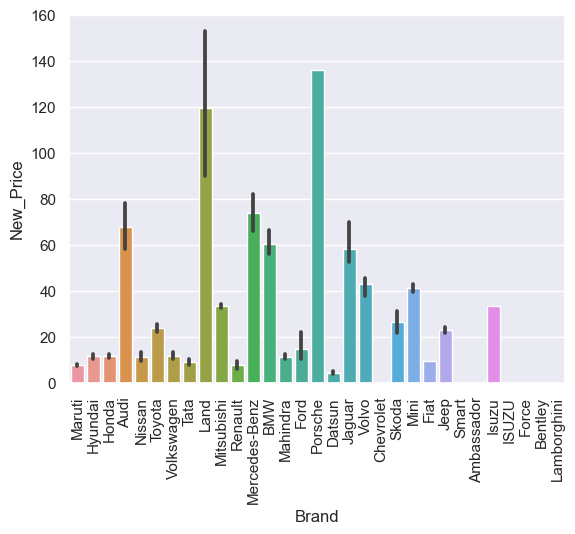

In [58]:
sns.barplot(y=traindata.New_Price, x=traindata.Brand)
plt.xticks(rotation=90)
plt.show()

In [59]:
Brands=['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']

In [60]:
traindata["Brand"]=traindata["Brand"].str.title()

In [61]:
traindata.head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Brand,Model,New_Price,Mileage
0,Mumbai,2010,72000,CNG,Manual,First,998.0,58.16,5.0,1.75,Maruti,Wagon,NaN,47.88
1,Pune,2015,41000,Diesel,Manual,First,1582.0,126.20,5.0,12.50,Hyundai,Creta,NaN,19.67
2,Chennai,2011,46000,Petrol,Manual,First,1199.0,88.70,5.0,4.50,Honda,Jazz,8.61,18.20
3,Chennai,2012,87000,Diesel,Manual,First,1248.0,88.76,7.0,6.00,Maruti,Ertiga,NaN,20.77
4,Coimbatore,2013,40670,Diesel,Automatic,Second,1968.0,140.80,5.0,17.74,Audi,A4,NaN,15.20
5,Hyderabad,2012,75000,LPG,Manual,First,814.0,55.20,5.0,2.35,Hyundai,EON,NaN,37.98
6,Jaipur,2013,86999,Diesel,Manual,First,1461.0,63.10,5.0,3.50,Nissan,Micra,NaN,23.08
7,Mumbai,2016,36000,Diesel,Automatic,First,2755.0,171.50,8.0,17.50,Toyota,Innova,21.00,11.36
8,Pune,2013,64430,Diesel,Manual,First,1598.0,103.60,5.0,5.20,Volkswagen,Vento,NaN,20.54
9,Chennai,2012,65932,Diesel,Manual,Second,1248.0,74.00,5.0,1.95,Tata,Indica,NaN,22.30


In [62]:
for i in catcol:
    print(f'Unique values in "{i}": \n {traindata[i].unique()}\n')

Unique values in "Location": 
 ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']

Unique values in "Year": 
 ['2010' '2015' '2011' '2012' '2013' '2016' '2018' '2014' '2017' '2007'
 '2009' '2008' '2019' '2006' '2005' '2004' '2002' '2000' '2003' '1999'
 '2001' '1998']

Unique values in "Fuel_Type": 
 ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']

Unique values in "Transmission": 
 ['Manual' 'Automatic']

Unique values in "Owner_Type": 
 ['First' 'Second' 'Fourth & Above' 'Third']

Unique values in "Seats": 
 [5.0, 7.0, 8.0, 4.0, 6.0, 2.0, NaN, 10.0, 9.0]
Categories (9, float64): [0.0, 2.0, 4.0, 5.0, ..., 7.0, 8.0, 9.0, 10.0]

Unique values in "Brand": 
 ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'Bmw' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'Force' 'Bentley' 'Lamborghi

In [63]:
Brands=['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'Bmw' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'Force' 'Bentley' 'Lamborghini']

In [64]:
catcol

Index(['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats',
       'Brand', 'Model'],
      dtype='object')

# Univariate Analysis

In [65]:
traindata.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Engine', 'Power', 'Seats', 'Price', 'Brand', 'Model',
       'New_Price', 'Mileage'],
      dtype='object')

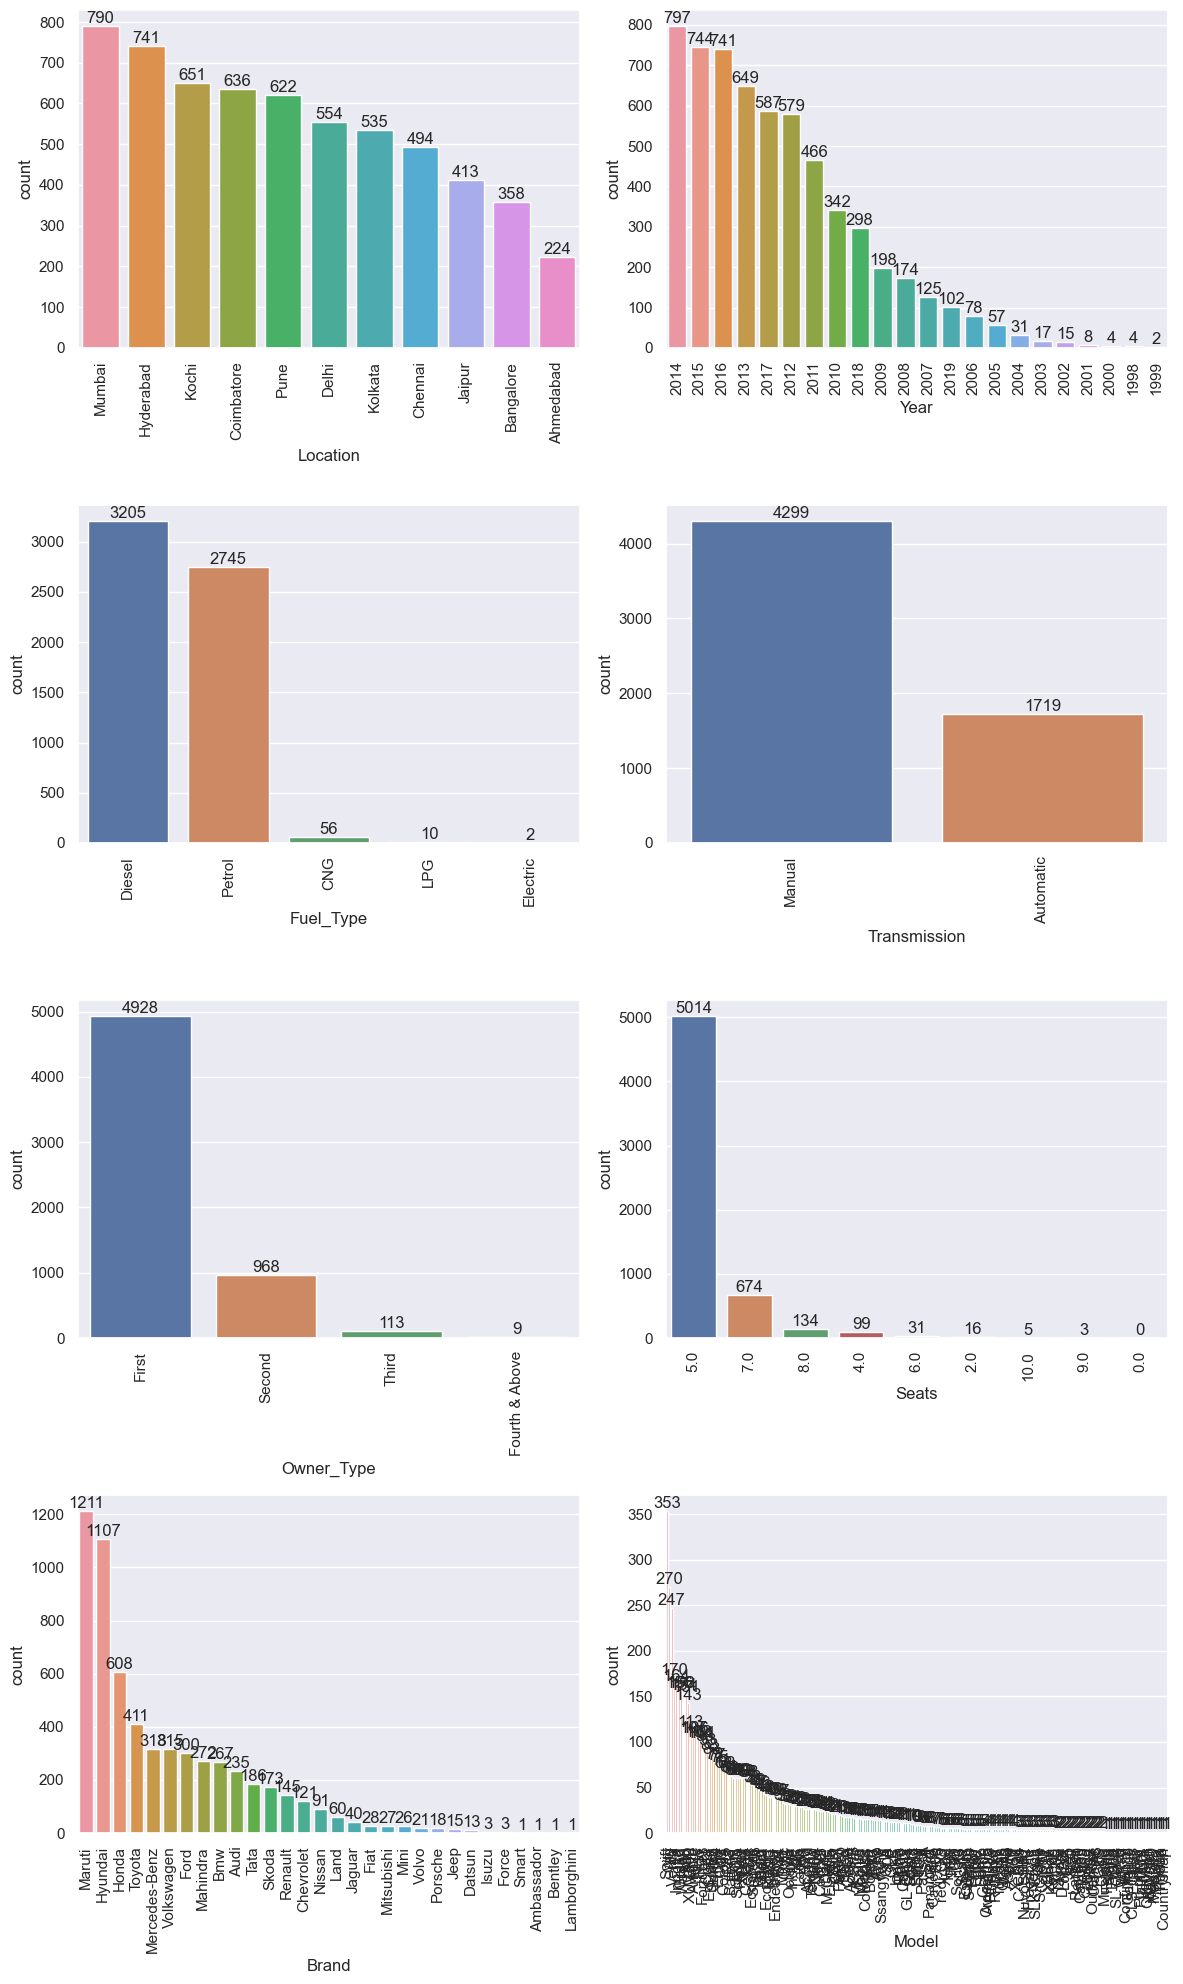

In [66]:

fig, axes = plt.subplots(4, 2, figsize=(12, 20))

for i, ax in enumerate(axes.flatten()):
    orders = traindata[catcol[i]].value_counts().index
    counts = traindata[catcol[i]].value_counts()

    sns.countplot(x=traindata[catcol[i]], order=orders, ax=ax)
    
    for y, count in enumerate(counts):
        ax.text(y, count, str(count), ha='center', va='bottom')

   
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


plt.tight_layout()


plt.show()


In [67]:
print(traindata.Model.value_counts())

Model
Swift         353
City          270
i20           247
Verna         170
Innova        164
             ... 
Beetle          1
Petra           1
Tiguan          1
Countryman      1
F               1
Name: count, Length: 212, dtype: int64


In [68]:
numcol

Index(['Kilometers_Driven', 'Engine', 'Power', 'Price', 'New_Price',
       'Mileage'],
      dtype='object')

In [69]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6018 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6018 non-null   object  
 1   Year               6018 non-null   object  
 2   Kilometers_Driven  6018 non-null   int64   
 3   Fuel_Type          6018 non-null   object  
 4   Transmission       6018 non-null   object  
 5   Owner_Type         6018 non-null   object  
 6   Engine             5982 non-null   float64 
 7   Power              5876 non-null   float64 
 8   Seats              5976 non-null   category
 9   Price              6018 non-null   float64 
 10  Brand              6018 non-null   object  
 11  Model              6018 non-null   object  
 12  New_Price          824 non-null    float64 
 13  Mileage            6016 non-null   float64 
dtypes: category(1), float64(5), int64(1), object(7)
memory usage: 664.5+ KB


In [70]:
traindata.describe(include=["int64","float64"])

,Kilometers_Driven,Engine,Power,Price,New_Price,Mileage
count,6.018000e+03,5982.000000,5876.000000,6018.000000,824.000000,6016.000000
mean,5.872737e+04,1621.013039,113.253050,9.478053,23.075655,18.351291
std,9.127243e+04,601.060211,53.874957,11.188307,26.182412,5.370046
min,1.710000e+02,72.000000,34.200000,0.440000,3.910000,0.000000
25%,3.400000e+04,1198.000000,75.000000,3.500000,7.977500,15.260000
50%,5.300000e+04,1493.000000,97.700000,5.640000,11.670000,18.190000
75%,7.300000e+04,1984.000000,138.100000,9.950000,26.560000,21.100000
max,6.500000e+06,5998.000000,560.000000,160.000000,230.000000,60.372000


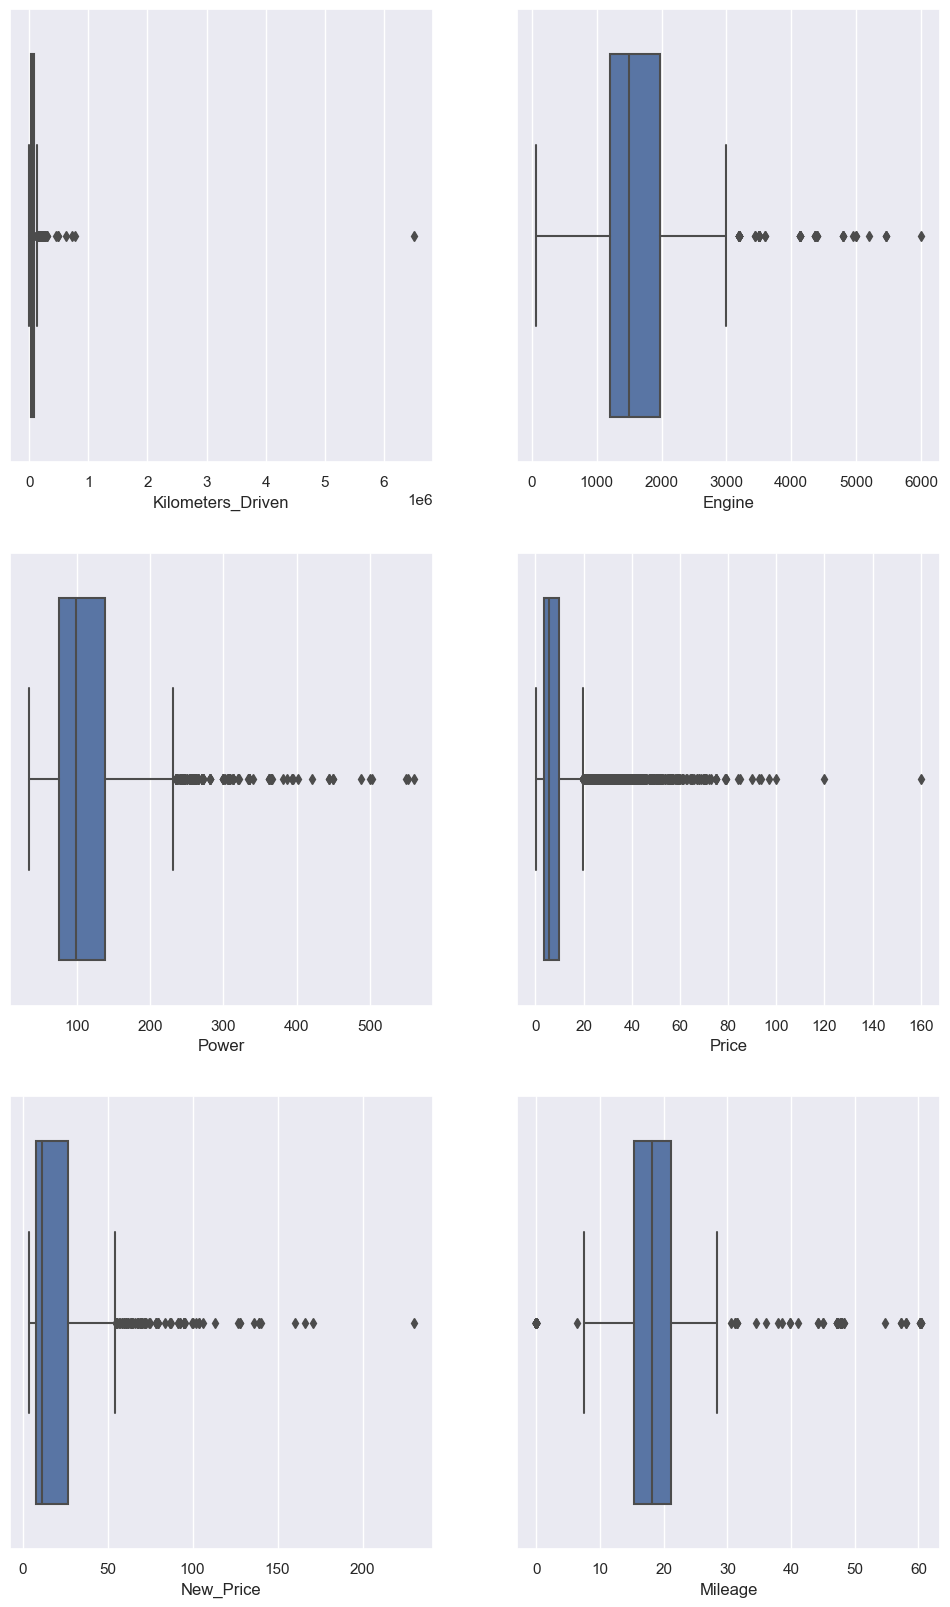

In [73]:
fig, axes = plt.subplots(3, 2, figsize=(12, 20))

for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x=traindata1[numcol[i]], ax=ax)

In [74]:
traindata.describe(include=["int64","float64"])

,Kilometers_Driven,Engine,Power,Price,New_Price,Mileage
count,6.018000e+03,5982.000000,5876.000000,6018.000000,824.000000,6016.000000
mean,5.872737e+04,1621.013039,113.253050,9.478053,23.075655,18.351291
std,9.127243e+04,601.060211,53.874957,11.188307,26.182412,5.370046
min,1.710000e+02,72.000000,34.200000,0.440000,3.910000,0.000000
25%,3.400000e+04,1198.000000,75.000000,3.500000,7.977500,15.260000
50%,5.300000e+04,1493.000000,97.700000,5.640000,11.670000,18.190000
75%,7.300000e+04,1984.000000,138.100000,9.950000,26.560000,21.100000
max,6.500000e+06,5998.000000,560.000000,160.000000,230.000000,60.372000


In [75]:
traindata[traindata["Mileage"]==0.0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Brand,Model,New_Price,Mileage
14,Pune,2012,85000,Diesel,Automatic,Second,2179.0,115.0,5.0,17.50,Land,Rover,NaN,0.0
67,Coimbatore,2019,15369,Diesel,Automatic,First,1950.0,194.0,5.0,35.67,Mercedes-Benz,C-Class,49.14,0.0
79,Hyderabad,2005,87591,Petrol,Manual,First,1086.0,NaN,5.0,1.30,Hyundai,Santro,NaN,0.0
194,Ahmedabad,2007,60006,Petrol,Manual,First,NaN,NaN,NaN,2.95,Honda,City,NaN,0.0
229,Bangalore,2015,70436,Diesel,Manual,First,1498.0,99.0,NaN,3.60,Ford,Figo,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,2446.0,NaN,8.0,2.20,Toyota,Qualis,NaN,0.0
5875,Ahmedabad,2019,4000,Diesel,Automatic,First,1950.0,194.0,5.0,35.00,Mercedes-Benz,C-Class,49.14,0.0
5943,Chennai,2002,75000,Diesel,Manual,First,2112.0,NaN,6.0,1.70,Mahindra,Jeep,NaN,0.0
5972,Mumbai,2008,65000,Petrol,Manual,Second,1086.0,62.0,5.0,1.39,Hyundai,Santro,NaN,0.0


Mileage Cannot be zero, this is wrong entry of data we should delete these rows

In [76]:
import copy

traindata1=traindata.copy()

In [77]:
traindata1.head(1)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Brand,Model,New_Price,Mileage
0,Mumbai,2010,72000,CNG,Manual,First,998.0,58.16,5.0,1.75,Maruti,Wagon,NaN,47.88


In [78]:
traindata1.drop(traindata1[traindata1.Mileage==0.0].index, inplace=True)

In [79]:
traindata1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5950 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           5950 non-null   object  
 1   Year               5950 non-null   object  
 2   Kilometers_Driven  5950 non-null   int64   
 3   Fuel_Type          5950 non-null   object  
 4   Transmission       5950 non-null   object  
 5   Owner_Type         5950 non-null   object  
 6   Engine             5925 non-null   float64 
 7   Power              5847 non-null   float64 
 8   Seats              5920 non-null   category
 9   Price              5950 non-null   float64 
 10  Brand              5950 non-null   object  
 11  Model              5950 non-null   object  
 12  New_Price          820 non-null    float64 
 13  Mileage            5948 non-null   float64 
dtypes: category(1), float64(5), int64(1), object(7)
memory usage: 657.0+ KB


In [80]:
traindata1.dropna(subset=['Power'], inplace=True)
traindata1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5847 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           5847 non-null   object  
 1   Year               5847 non-null   object  
 2   Kilometers_Driven  5847 non-null   int64   
 3   Fuel_Type          5847 non-null   object  
 4   Transmission       5847 non-null   object  
 5   Owner_Type         5847 non-null   object  
 6   Engine             5847 non-null   float64 
 7   Power              5847 non-null   float64 
 8   Seats              5846 non-null   category
 9   Price              5847 non-null   float64 
 10  Brand              5847 non-null   object  
 11  Model              5847 non-null   object  
 12  New_Price          820 non-null    float64 
 13  Mileage            5845 non-null   float64 
dtypes: category(1), float64(5), int64(1), object(7)
memory usage: 645.6+ KB


In [81]:
traindata1.dropna(subset=['Mileage'], inplace=True)
traindata1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5845 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           5845 non-null   object  
 1   Year               5845 non-null   object  
 2   Kilometers_Driven  5845 non-null   int64   
 3   Fuel_Type          5845 non-null   object  
 4   Transmission       5845 non-null   object  
 5   Owner_Type         5845 non-null   object  
 6   Engine             5845 non-null   float64 
 7   Power              5845 non-null   float64 
 8   Seats              5844 non-null   category
 9   Price              5845 non-null   float64 
 10  Brand              5845 non-null   object  
 11  Model              5845 non-null   object  
 12  New_Price          819 non-null    float64 
 13  Mileage            5845 non-null   float64 
dtypes: category(1), float64(5), int64(1), object(7)
memory usage: 645.4+ KB


In [82]:
traindata1.dropna(subset=['Seats'], inplace=True)
traindata1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5844 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           5844 non-null   object  
 1   Year               5844 non-null   object  
 2   Kilometers_Driven  5844 non-null   int64   
 3   Fuel_Type          5844 non-null   object  
 4   Transmission       5844 non-null   object  
 5   Owner_Type         5844 non-null   object  
 6   Engine             5844 non-null   float64 
 7   Power              5844 non-null   float64 
 8   Seats              5844 non-null   category
 9   Price              5844 non-null   float64 
 10  Brand              5844 non-null   object  
 11  Model              5844 non-null   object  
 12  New_Price          819 non-null    float64 
 13  Mileage            5844 non-null   float64 
dtypes: category(1), float64(5), int64(1), object(7)
memory usage: 645.3+ KB


In [83]:
traindata1[numcol].max().sort_values()

Mileage                   60.372
Price                    160.000
New_Price                230.000
Power                    560.000
Engine                  5998.000
Kilometers_Driven    6500000.000
dtype: float64

Text(0.5, 1.0, 'Outliers')

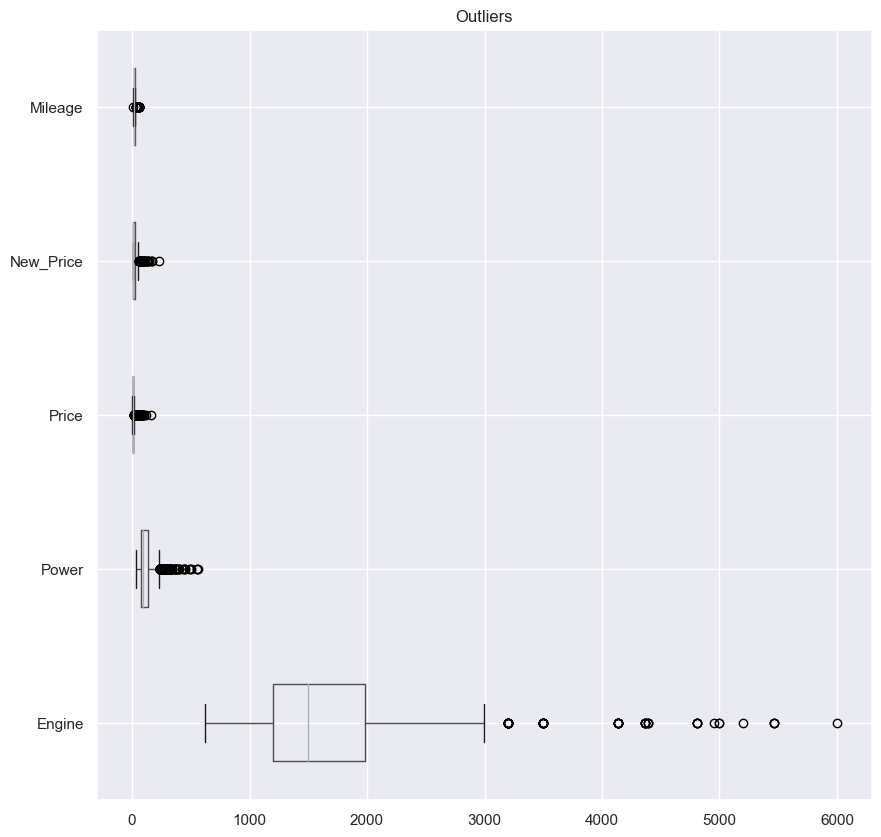

In [84]:
plt.figure(figsize=(10,10))
traindata1[numcol].drop(["Kilometers_Driven"],axis=1).boxplot(vert=0)
plt.title("Outliers")

# Bi-Variate Analysis

In [85]:
#numcol=numcol.drop("Price")

In [86]:
traindata1[numcol].corr()

,Kilometers_Driven,Engine,Power,Price,New_Price,Mileage
Kilometers_Driven,1.000000,0.093853,0.034379,-0.007022,-0.002340,-0.054114
Engine,0.093853,1.000000,0.866804,0.657331,0.724704,-0.579940
Power,0.034379,0.866804,1.000000,0.774946,0.870788,-0.500680
Price,-0.007022,0.657331,0.774946,1.000000,0.871573,-0.303620
New_Price,-0.002340,0.724704,0.870788,0.871573,1.000000,-0.318803
Mileage,-0.054114,-0.579940,-0.500680,-0.303620,-0.318803,1.000000


<Axes: >

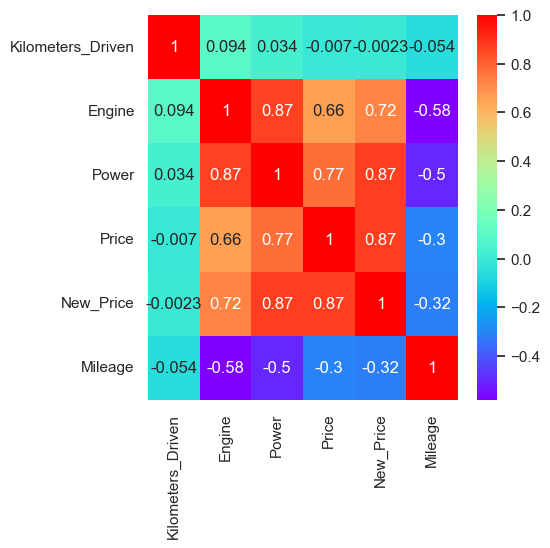

In [87]:
plt.figure(figsize=(5,5))
sns.heatmap(traindata1[numcol].corr(),annot=True, cmap="rainbow")

correlated columns are:[('Power', 'Engine'), ('New_Price', 'Engine'), ('New_Price', 'Power')]


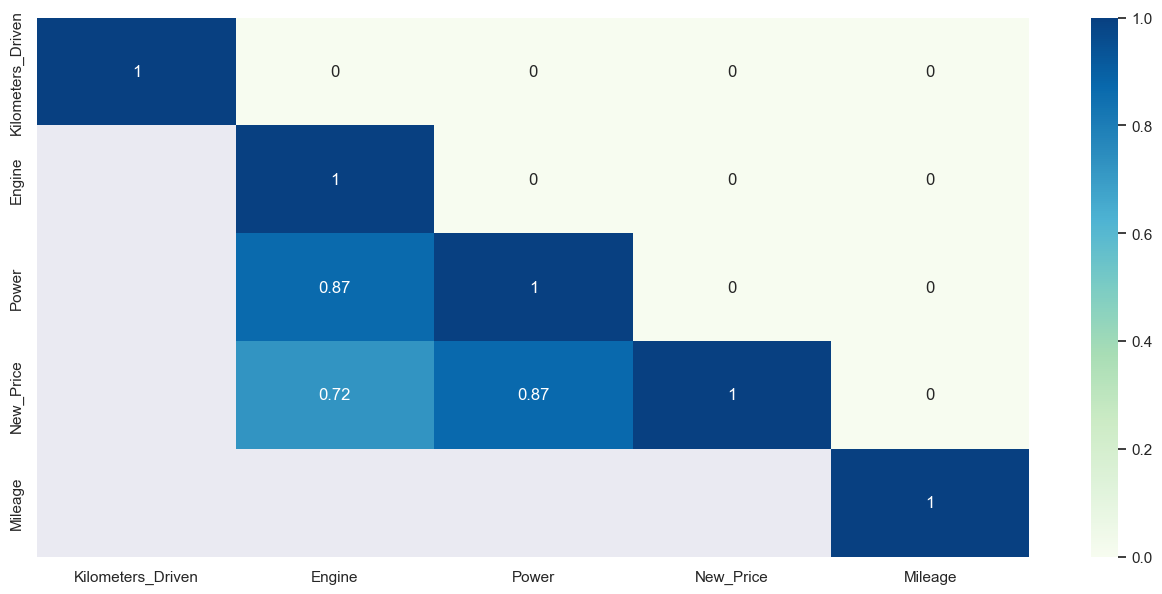

In [88]:
correl=traindata1[numcol.drop("Price")].corr()
correl2=correl[correl>.65]
correl3=pd.DataFrame(np.tril(correl2.values,k=0))
correl3.columns=correl.columns
correl3.index=correl.index

plt.subplots(figsize=(16,7))
plt.grid()
sns.heatmap(data=correl3,annot=True,cmap="GnBu")

correlated_columns=correl3[correl3<1][correl3[correl3<1]>.65].stack().index.to_list()
print(f"correlated columns are:{correlated_columns}")

Power and Engine are corrlated variables,

New_Price shall also be dropped as it has lots of missing values


In [89]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(traindata1["Power"], traindata1["Engine"])

print(f"Pearson correlation coefficient: {corr_coeff}")
print(f"P-value: {p_value}")


Pearson correlation coefficient: 0.8668036974480506
P-value: 0.0


<Axes: xlabel='Power', ylabel='Engine'>

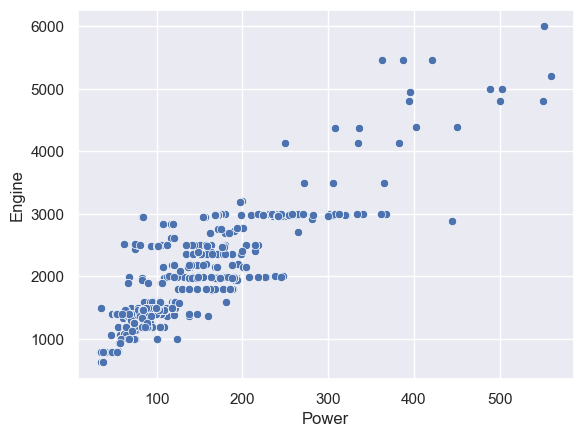

In [90]:
sns.scatterplot(x="Power",y="Engine", data=traindata1)

p value is less than 0.005 which means that  there is evidence to reject the null hypothesis 
that there is no correlation between power and Engine variables, hnace we shall be dropping either of the columns before model training

In [91]:
traindata1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5844 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           5844 non-null   object  
 1   Year               5844 non-null   object  
 2   Kilometers_Driven  5844 non-null   int64   
 3   Fuel_Type          5844 non-null   object  
 4   Transmission       5844 non-null   object  
 5   Owner_Type         5844 non-null   object  
 6   Engine             5844 non-null   float64 
 7   Power              5844 non-null   float64 
 8   Seats              5844 non-null   category
 9   Price              5844 non-null   float64 
 10  Brand              5844 non-null   object  
 11  Model              5844 non-null   object  
 12  New_Price          819 non-null    float64 
 13  Mileage            5844 non-null   float64 
dtypes: category(1), float64(5), int64(1), object(7)
memory usage: 645.3+ KB


In [92]:
correlated_columns

[('Power', 'Engine'), ('New_Price', 'Engine'), ('New_Price', 'Power')]

In [93]:
catcol

Index(['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats',
       'Brand', 'Model'],
      dtype='object')

In [94]:
numcol

Index(['Kilometers_Driven', 'Engine', 'Power', 'Price', 'New_Price',
       'Mileage'],
      dtype='object')

In [95]:
traindata1.head(2)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Brand,Model,New_Price,Mileage
0,Mumbai,2010,72000,CNG,Manual,First,998.0,58.16,5.0,1.75,Maruti,Wagon,NaN,47.88
1,Pune,2015,41000,Diesel,Manual,First,1582.0,126.20,5.0,12.50,Hyundai,Creta,NaN,19.67


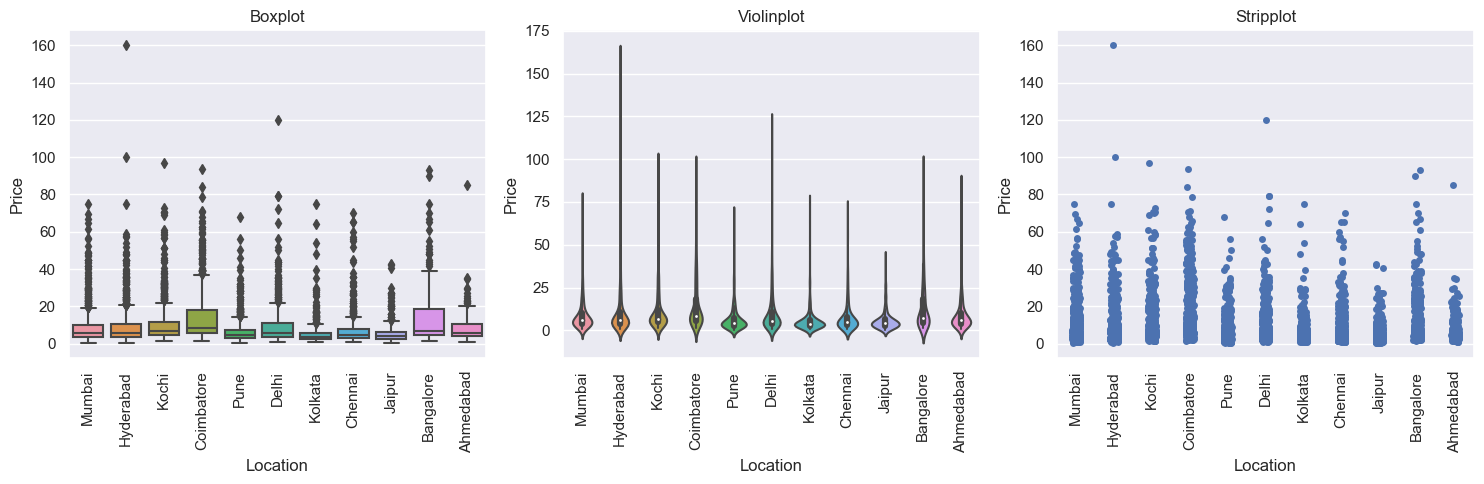

In [96]:
plt.figure(figsize=(15, 5))

order = traindata1.Location.value_counts().index

plot_types = ["boxplot", "violinplot", "stripplot"]

for i, plot_type in enumerate(plot_types, 1):
    plt.subplot(1, 3, i)
    
    if plot_type == "boxplot":
        sns.boxplot(x='Location', y='Price', data=traindata1, order=order)
        plt.title('Boxplot')
    elif plot_type == "violinplot":
        sns.violinplot(x='Location', y='Price', data=traindata1, order=order)
        plt.title('Violinplot')
    elif plot_type == "stripplot":
        sns.stripplot(x='Location', y='Price', data=traindata1, order=order)
        plt.title('Stripplot')

    plt.xlabel('Location')
    plt.ylabel('Price')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [97]:
order = traindata1.Location.value_counts()
order

Location
Mumbai        773
Hyderabad     713
Kochi         643
Coimbatore    626
Pune          590
Delhi         543
Kolkata       519
Chennai       475
Jaipur        401
Bangalore     343
Ahmedabad     218
Name: count, dtype: int64

In [98]:
catcol

Index(['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats',
       'Brand', 'Model'],
      dtype='object')

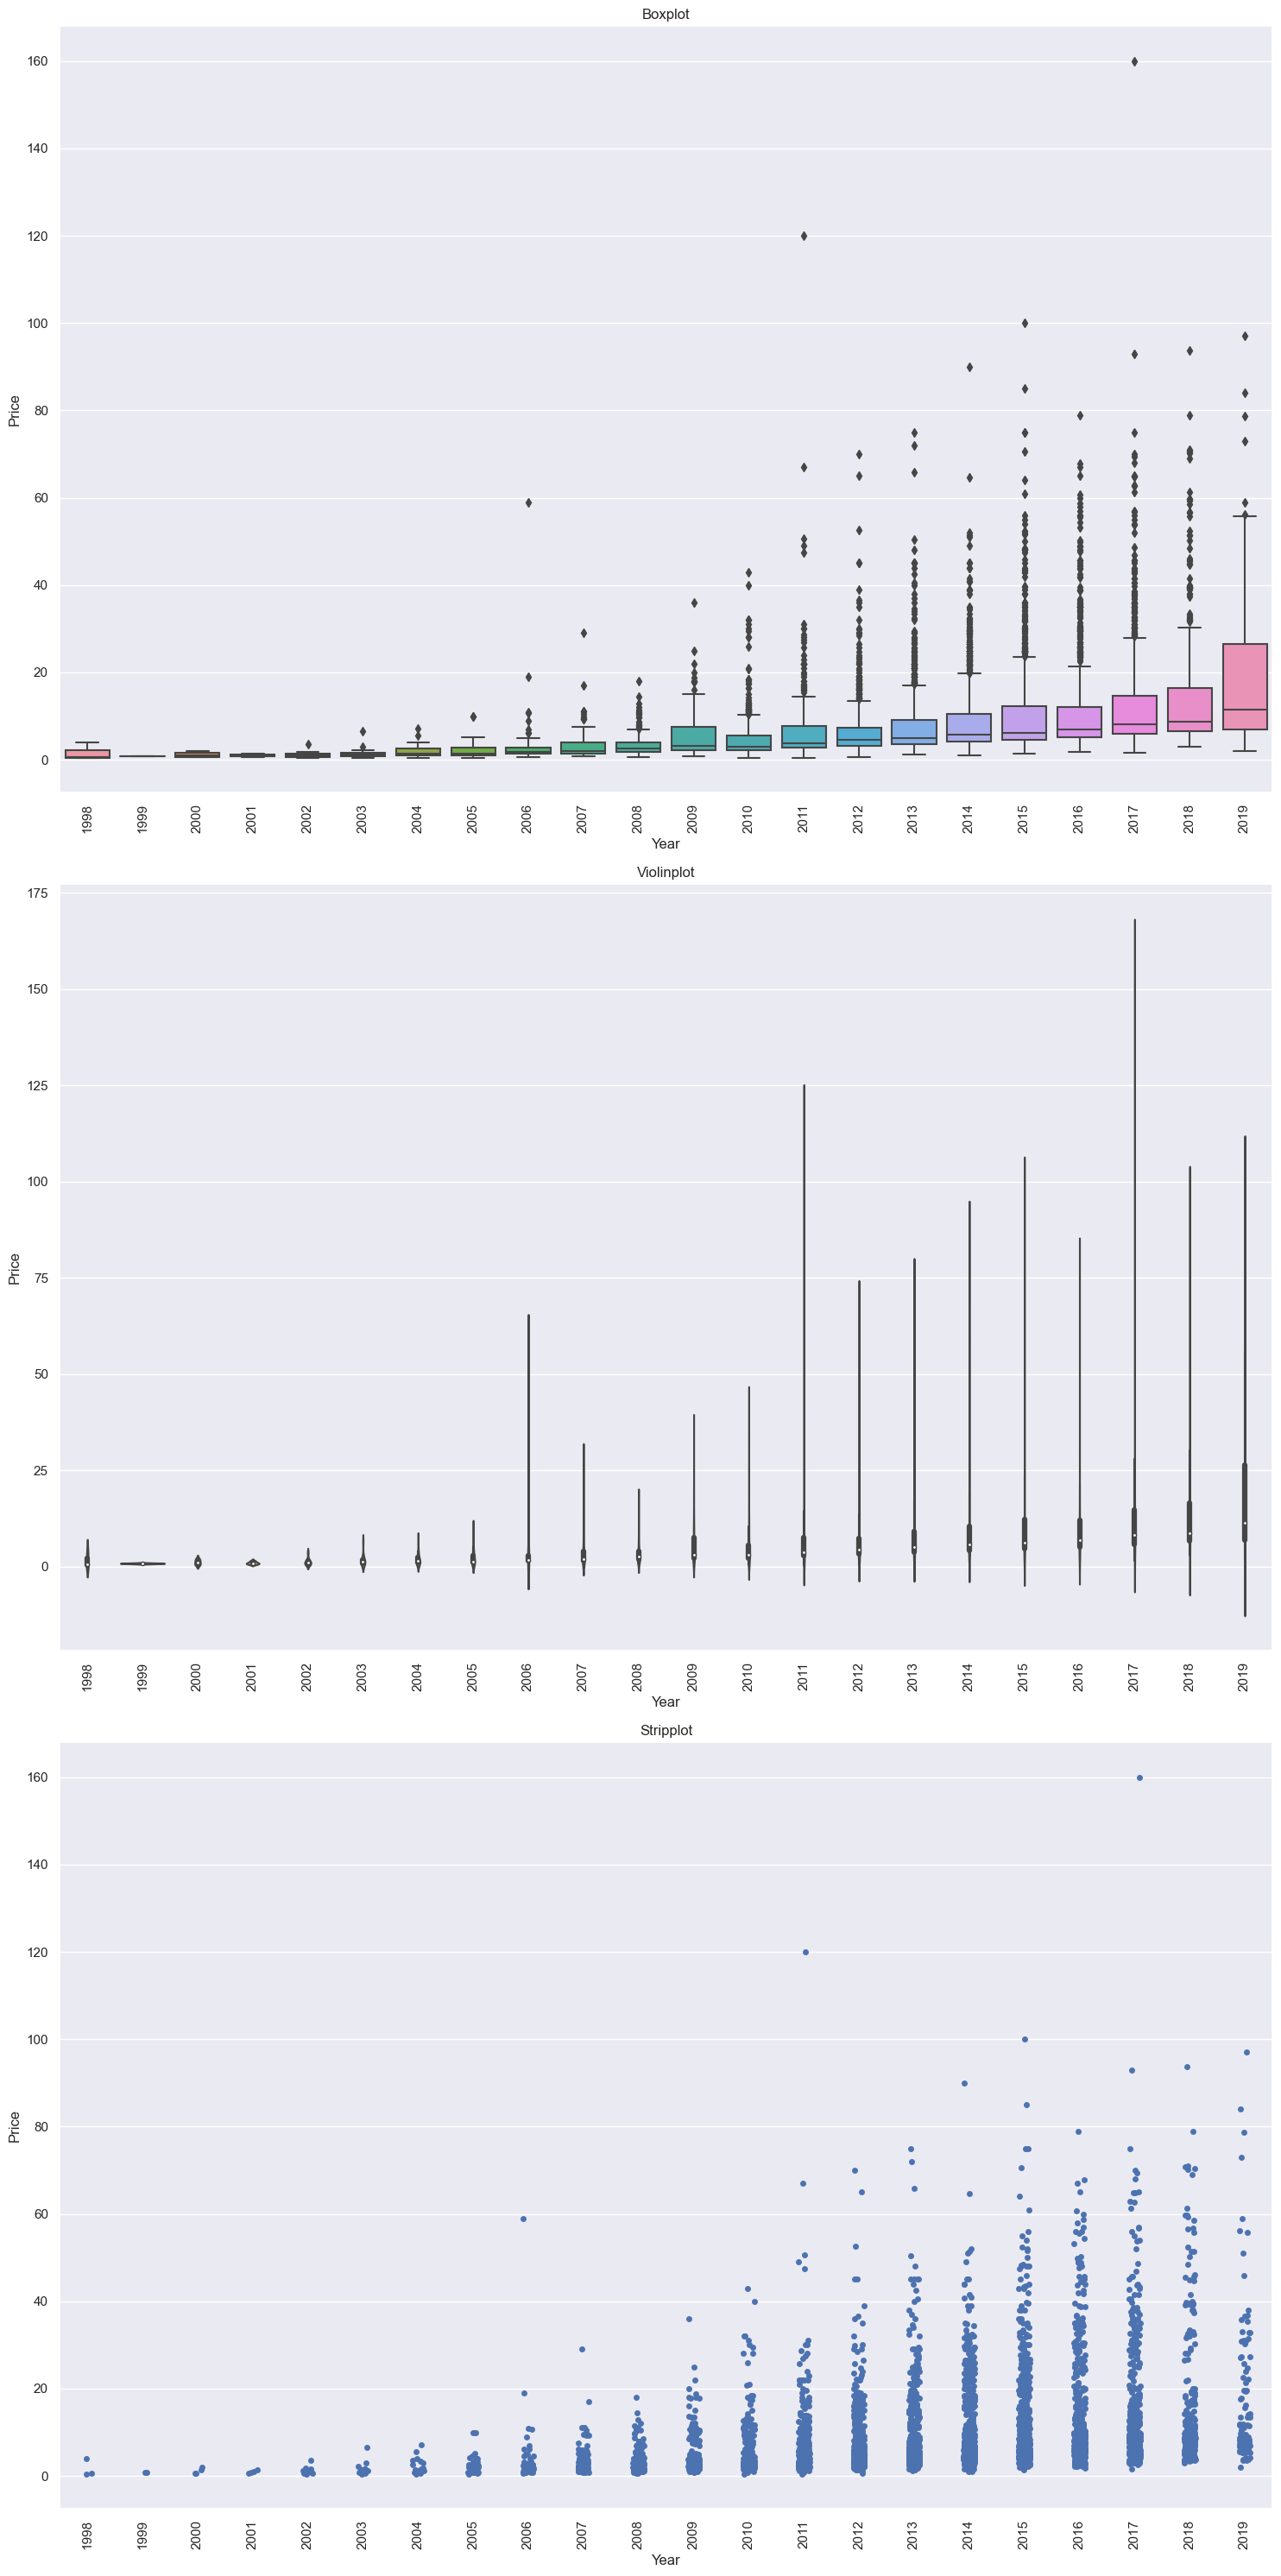

In [99]:
order = sorted (traindata1.Year.unique())

plots = ["boxplot", "violinplot", "stripplot"]

plt.figure(figsize=(15, 30))

for i, k in enumerate(plots, 1):
    plt.subplot(3, 1, i)
    
    if k == "boxplot":
        sns.boxplot(x='Year', y='Price', data=traindata1, order=order)
        plt.title('Boxplot')
    elif k == "violinplot":
        sns.violinplot(x='Year', y='Price', data=traindata1, order=order)
        plt.title('Violinplot')
    elif k == "stripplot":
        sns.stripplot(x='Year', y='Price', data=traindata1, order=order)
        plt.title('Stripplot')

    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

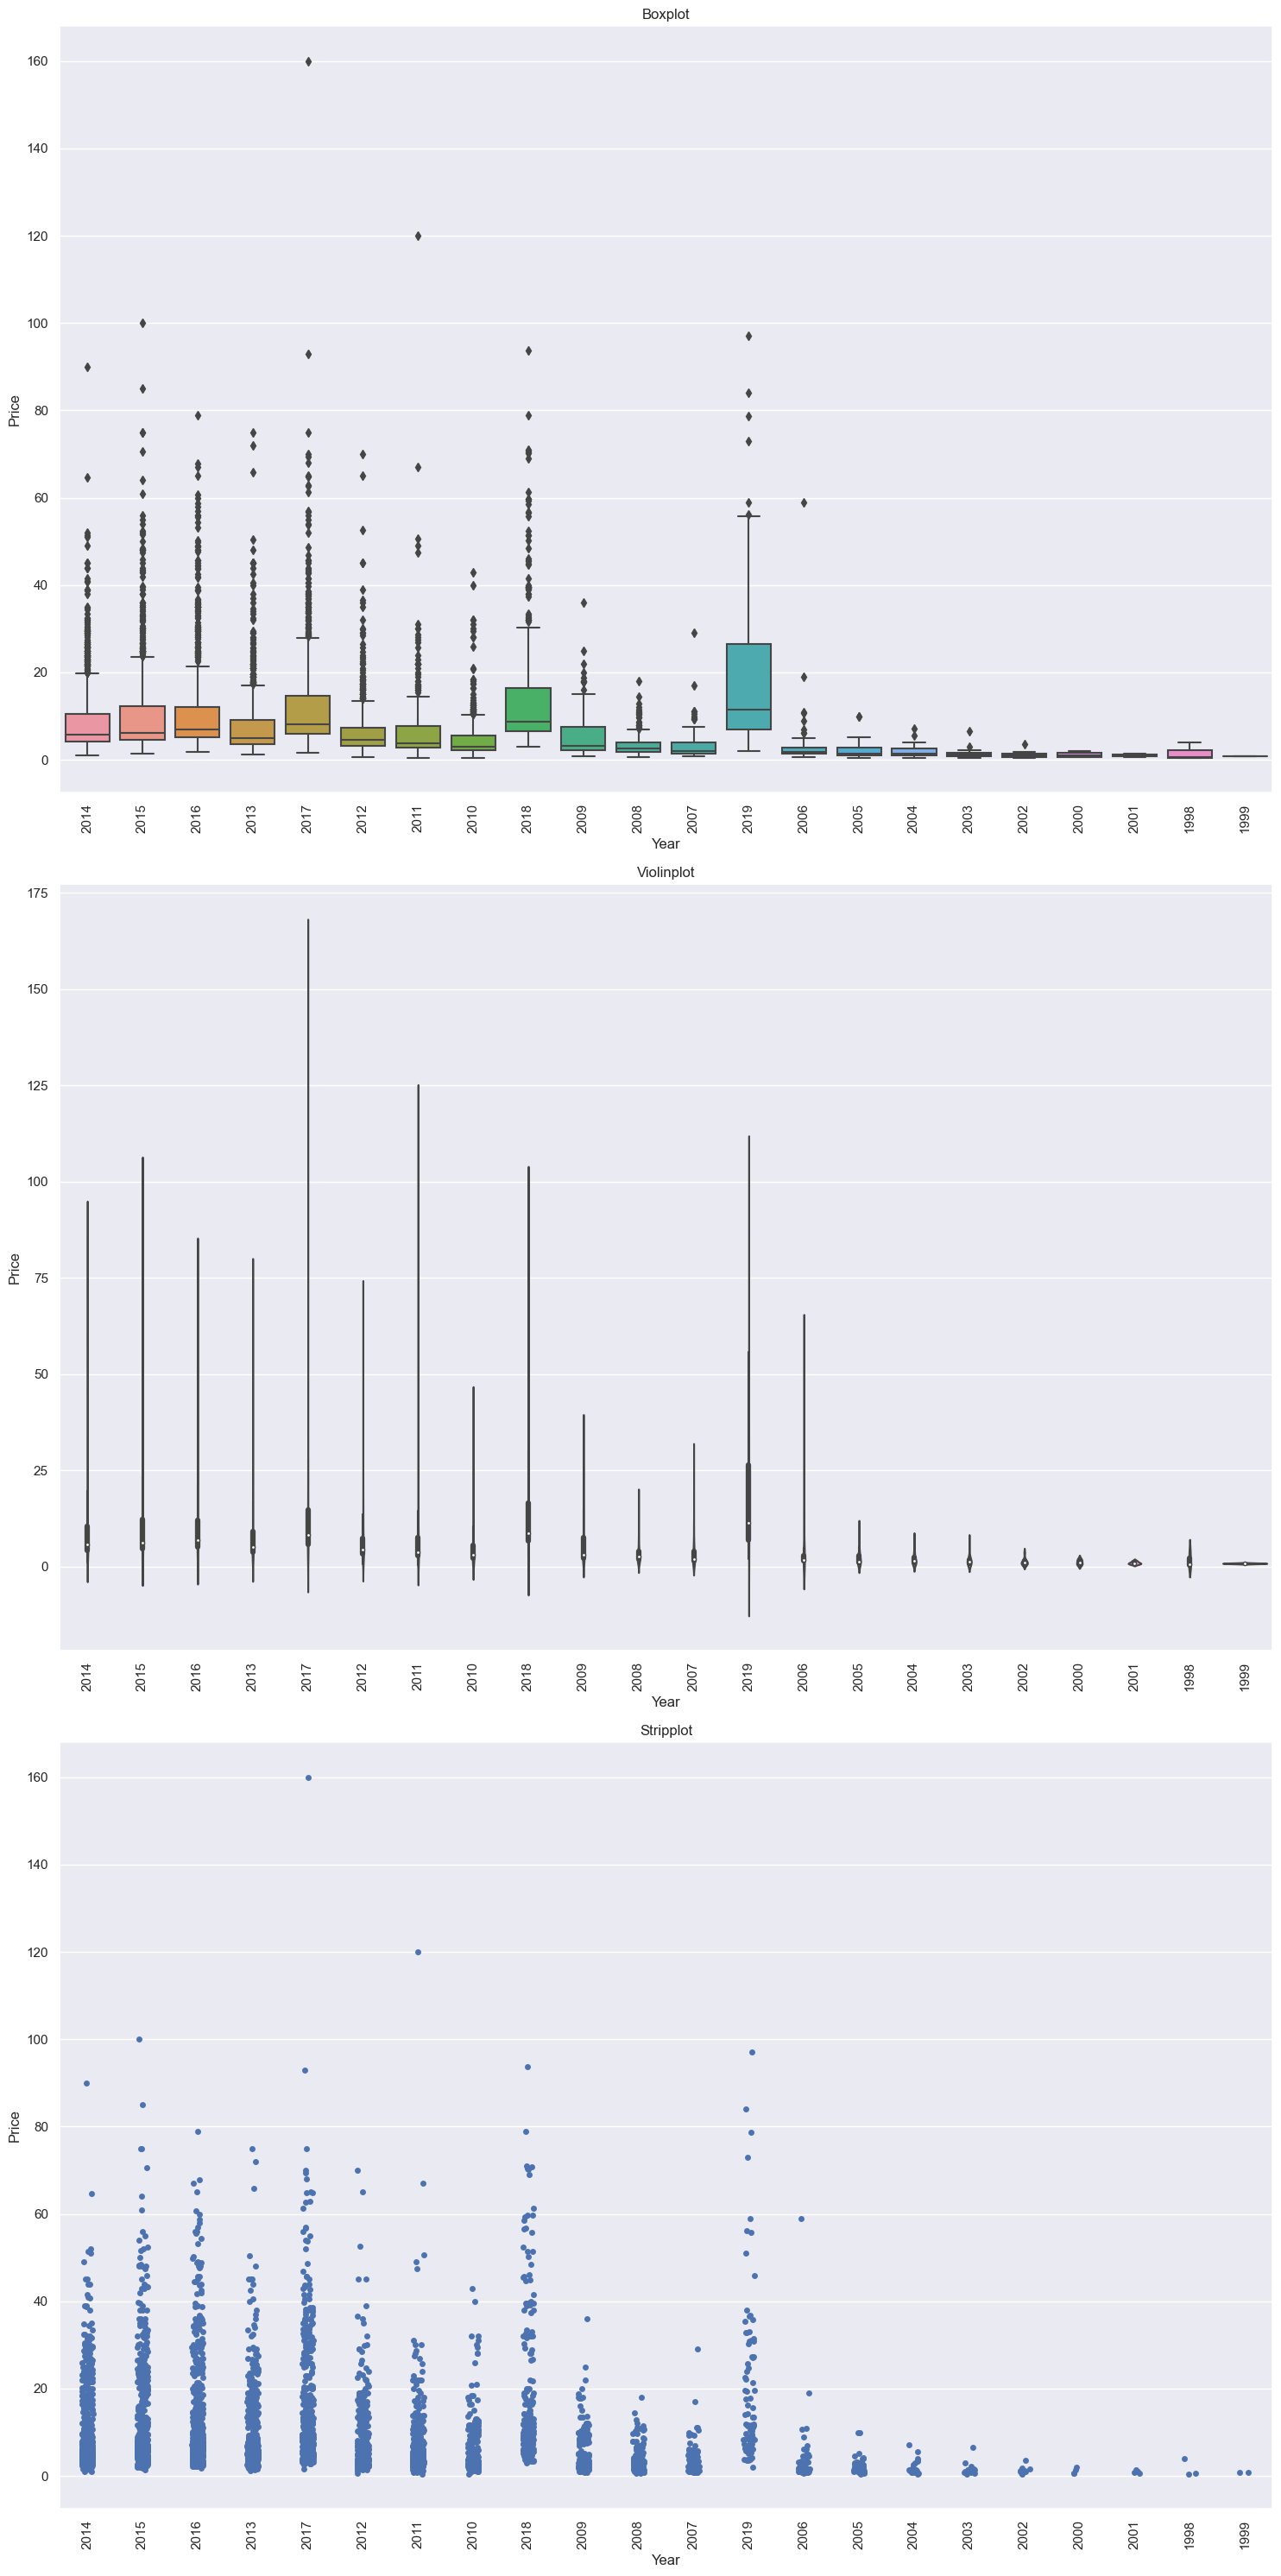

In [100]:
order = traindata1.Year.value_counts().index

plots = ["boxplot", "violinplot", "stripplot"]

plt.figure(figsize=(15, 30))

for i, k in enumerate(plots, 1):
    plt.subplot(3, 1, i)
    
    if k == "boxplot":
        sns.boxplot(x='Year', y='Price', data=traindata1, order=order)
        plt.title('Boxplot')
    elif k == "violinplot":
        sns.violinplot(x='Year', y='Price', data=traindata1, order=order)
        plt.title('Violinplot')
    elif k == "stripplot":
        sns.stripplot(x='Year', y='Price', data=traindata1, order=order)
        plt.title('Stripplot')

    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [101]:
catcol

Index(['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats',
       'Brand', 'Model'],
      dtype='object')

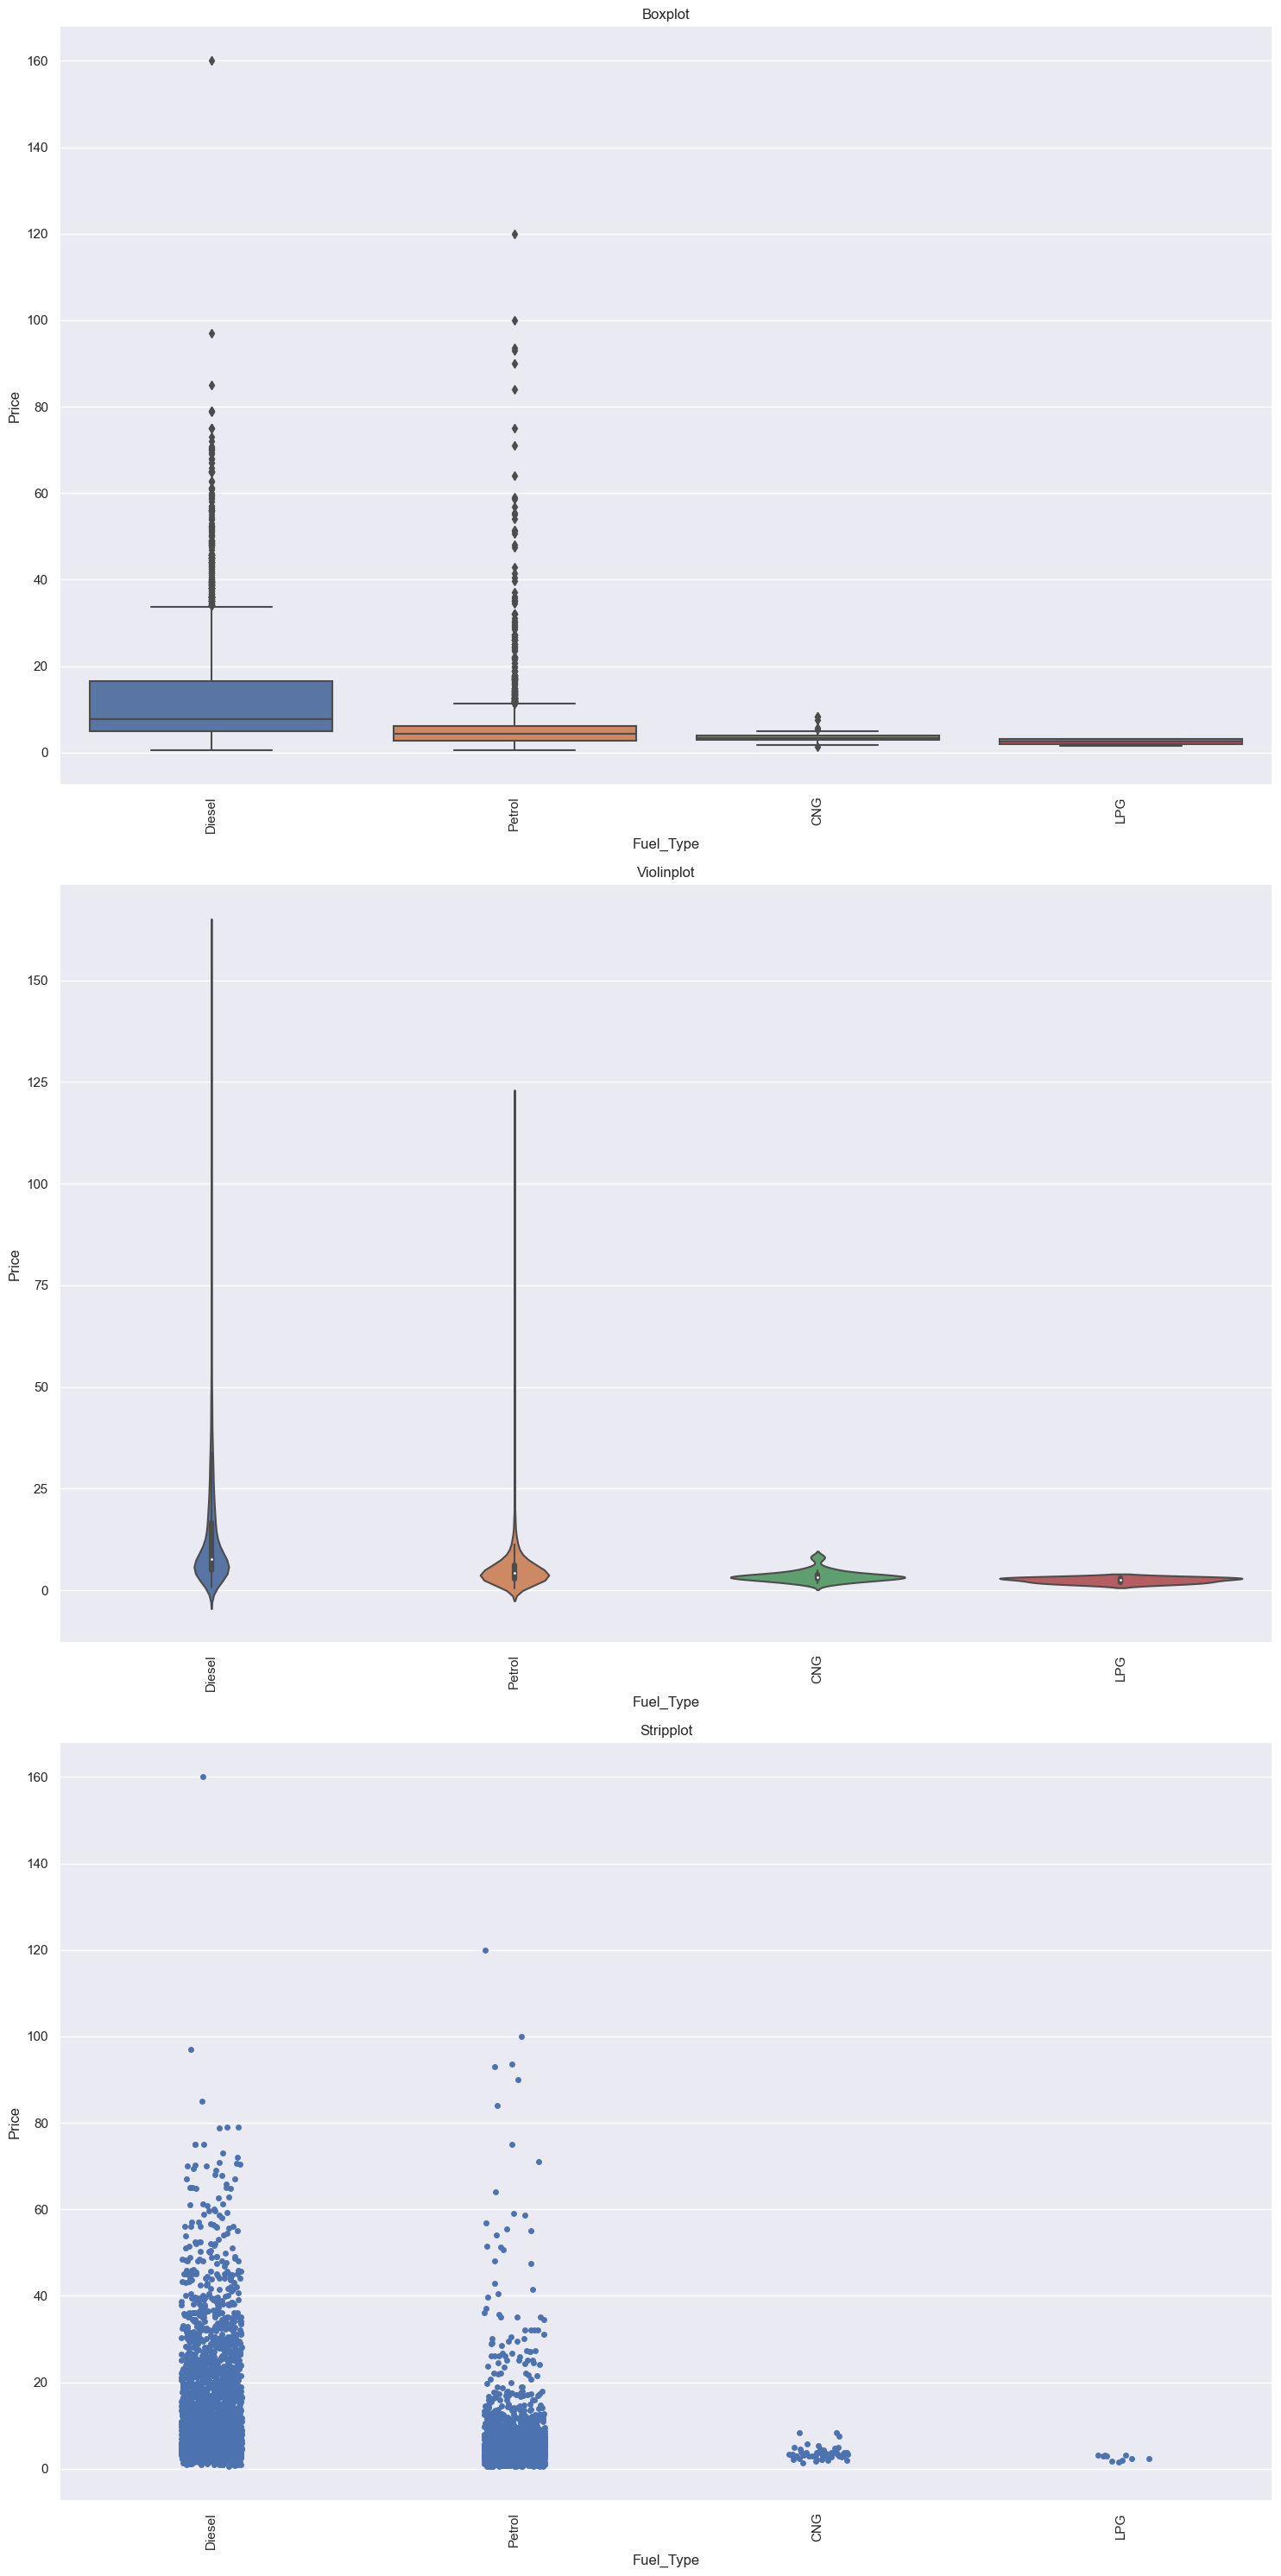

In [102]:
order = traindata1['Fuel_Type'].value_counts().index

plots = ["boxplot", "violinplot", "stripplot"]

plt.figure(figsize=(15, 30))

for i, k in enumerate(plots, 1):
    plt.subplot(3, 1, i)
    
    if k == "boxplot":
        sns.boxplot(x='Fuel_Type', y='Price', data=traindata1, order=order)
        plt.title('Boxplot')
    elif k == "violinplot":
        sns.violinplot(x='Fuel_Type', y='Price', data=traindata1, order=order)
        plt.title('Violinplot')
    elif k == "stripplot":
        sns.stripplot(x='Fuel_Type', y='Price', data=traindata1, order=order)
        plt.title('Stripplot')

    plt.xlabel('Fuel_Type')
    plt.ylabel('Price')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

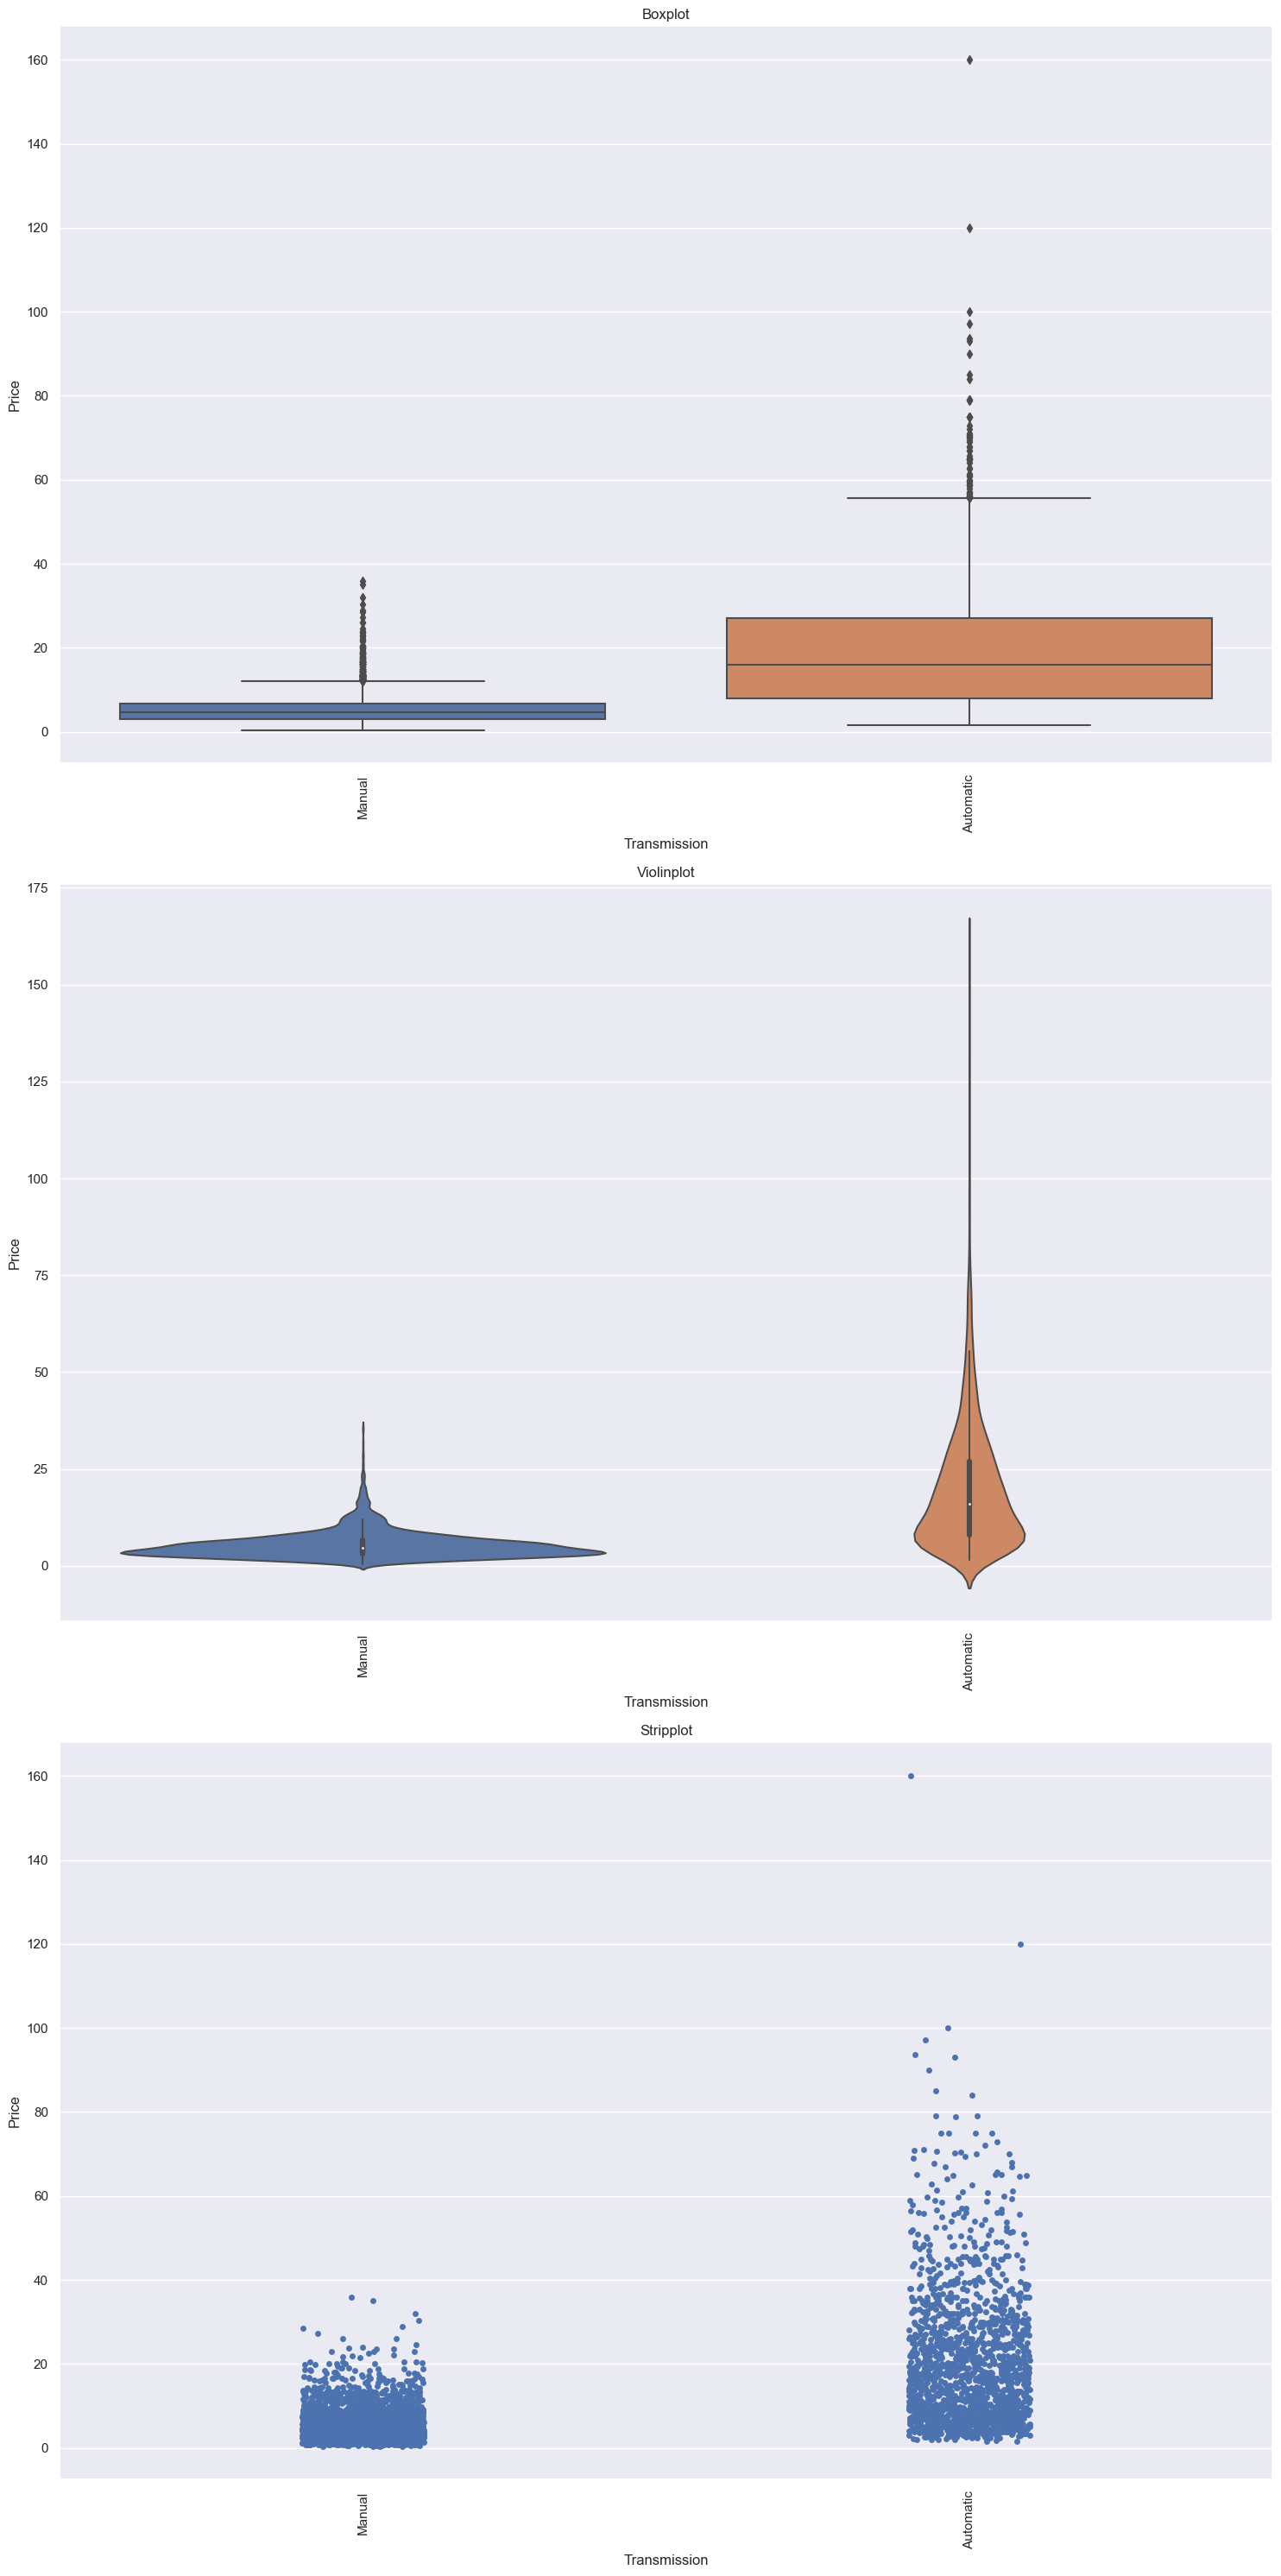

In [103]:
order = traindata1['Transmission'].value_counts().index

plots = ["boxplot", "violinplot", "stripplot"]

plt.figure(figsize=(15, 30))

for i, k in enumerate(plots, 1):
    plt.subplot(3, 1, i)
    
    if k == "boxplot":
        sns.boxplot(x='Transmission', y='Price', data=traindata1, order=order)
        plt.title('Boxplot')
    elif k == "violinplot":
        sns.violinplot(x='Transmission', y='Price', data=traindata1, order=order)
        plt.title('Violinplot')
    elif k == "stripplot":
        sns.stripplot(x='Transmission', y='Price', data=traindata1, order=order)
        plt.title('Stripplot')

    plt.xlabel('Transmission')
    plt.ylabel('Price')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [104]:
catcol

Index(['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats',
       'Brand', 'Model'],
      dtype='object')

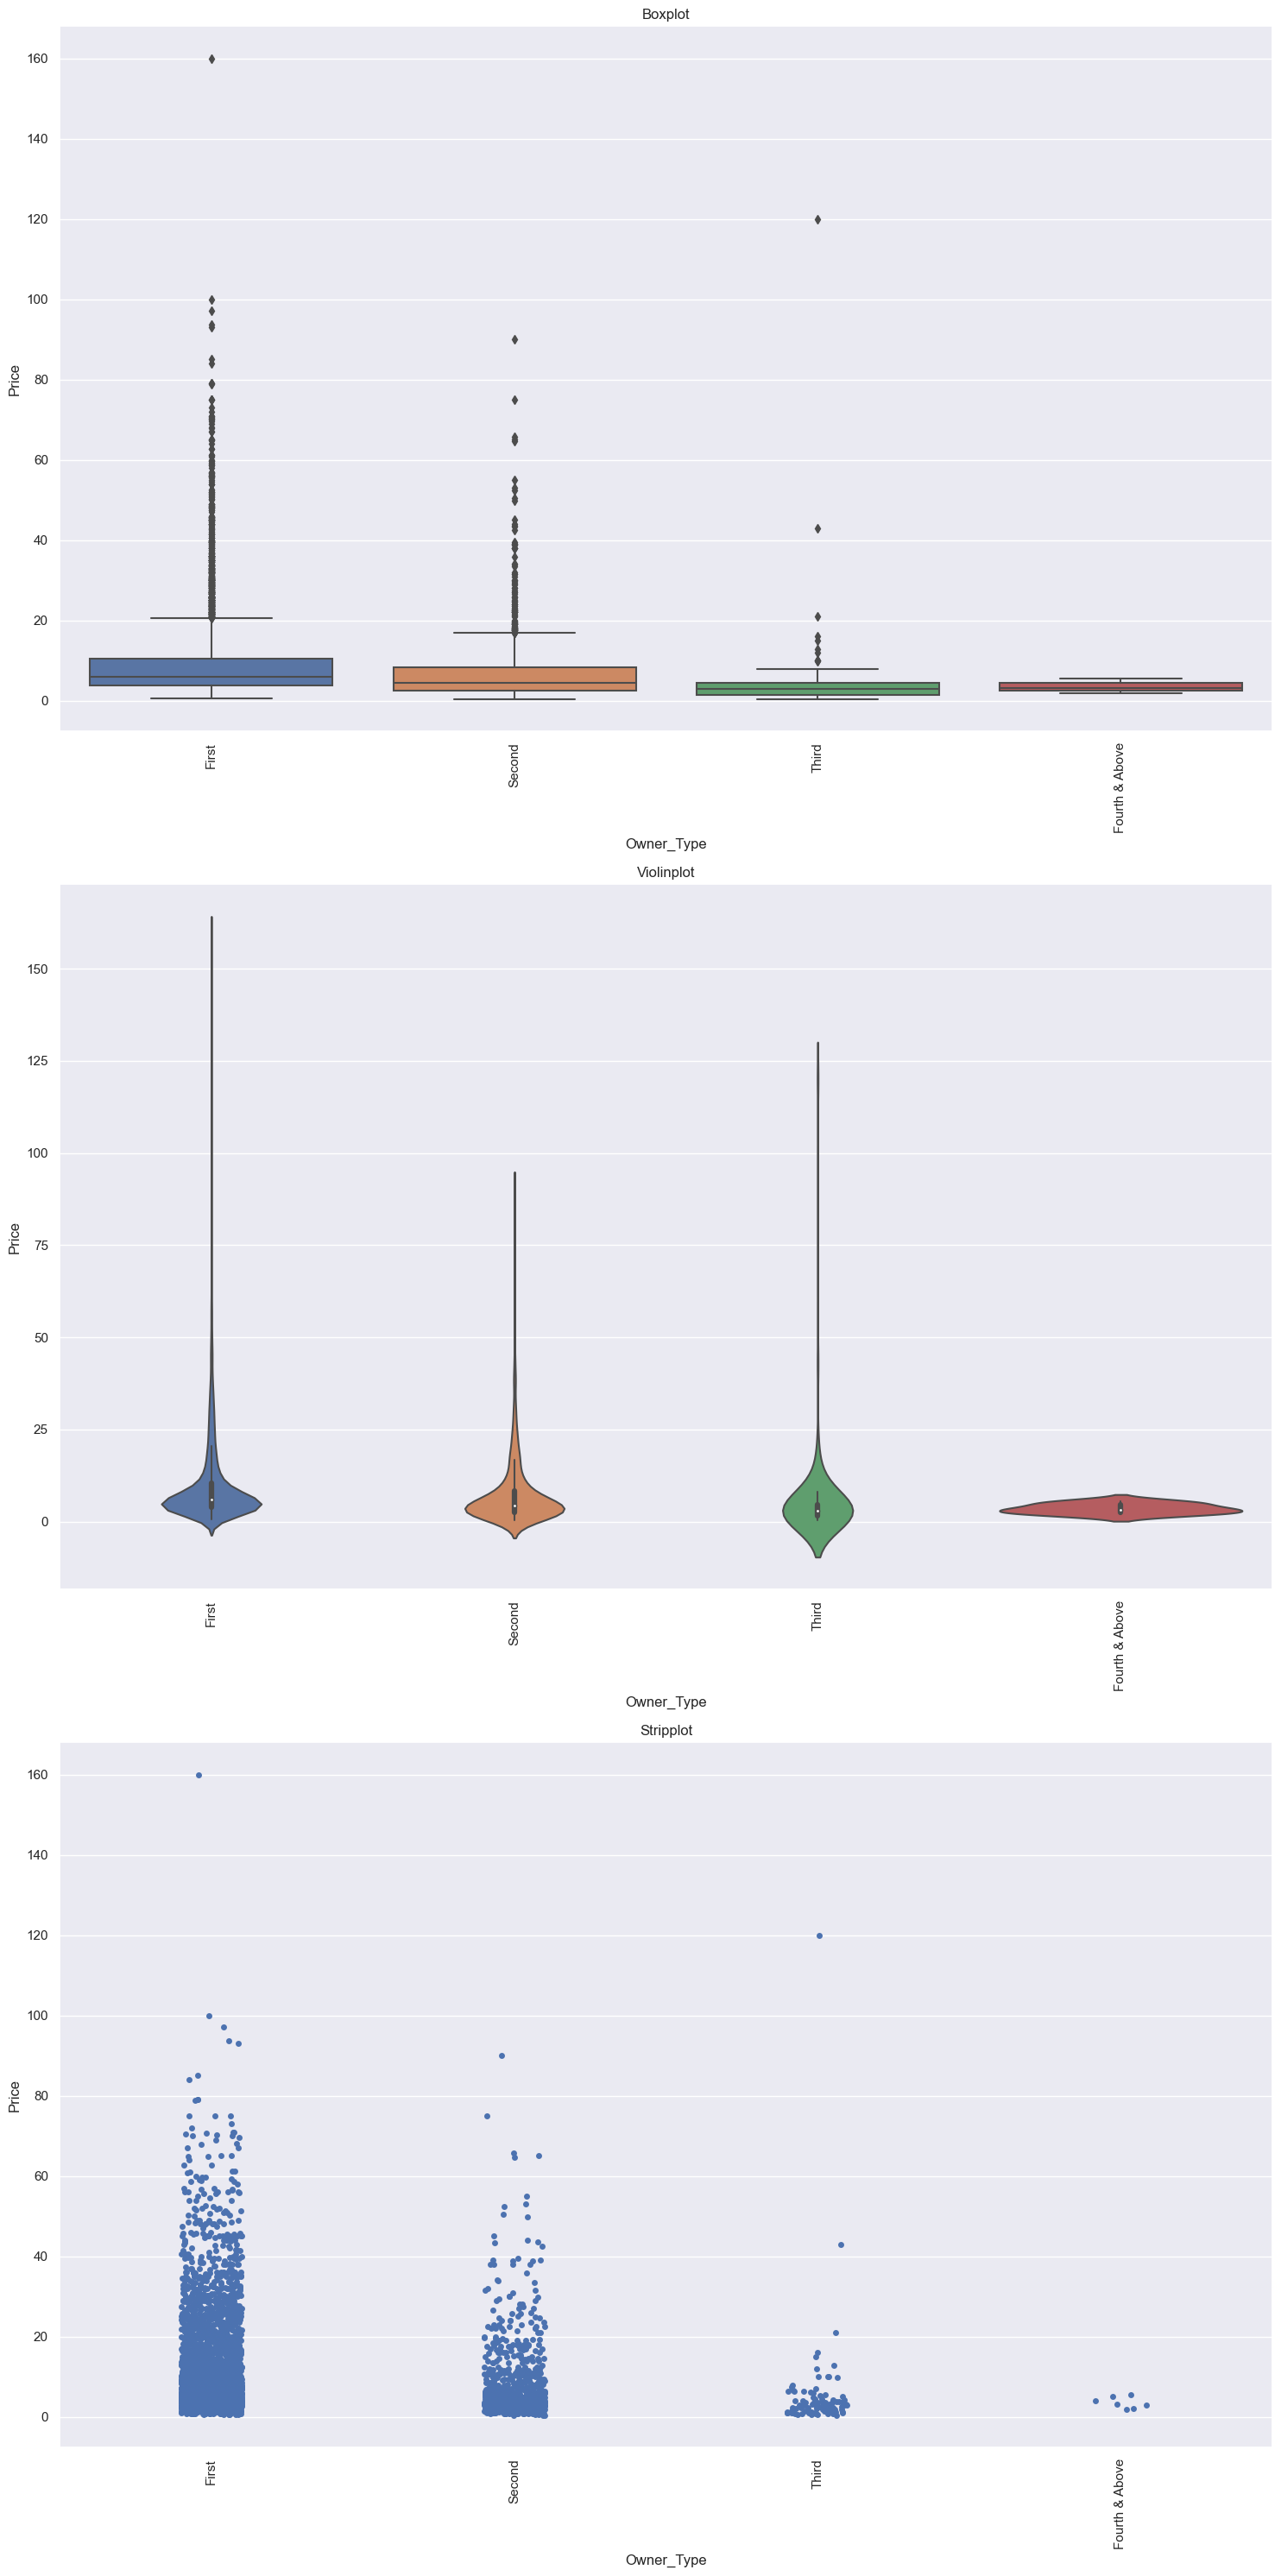

In [105]:
order = traindata1['Owner_Type'].value_counts().index

plots = ["boxplot", "violinplot", "stripplot"]

plt.figure(figsize=(15, 30))

for i, k in enumerate(plots, 1):
    plt.subplot(3, 1, i)
    
    if k == "boxplot":
        sns.boxplot(x='Owner_Type', y='Price', data=traindata1, order=order)
        plt.title('Boxplot')
    elif k == "violinplot":
        sns.violinplot(x='Owner_Type', y='Price', data=traindata1, order=order)
        plt.title('Violinplot')
    elif k == "stripplot":
        sns.stripplot(x='Owner_Type', y='Price', data=traindata1, order=order)
        plt.title('Stripplot')

    plt.xlabel('Owner_Type')
    plt.ylabel('Price')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

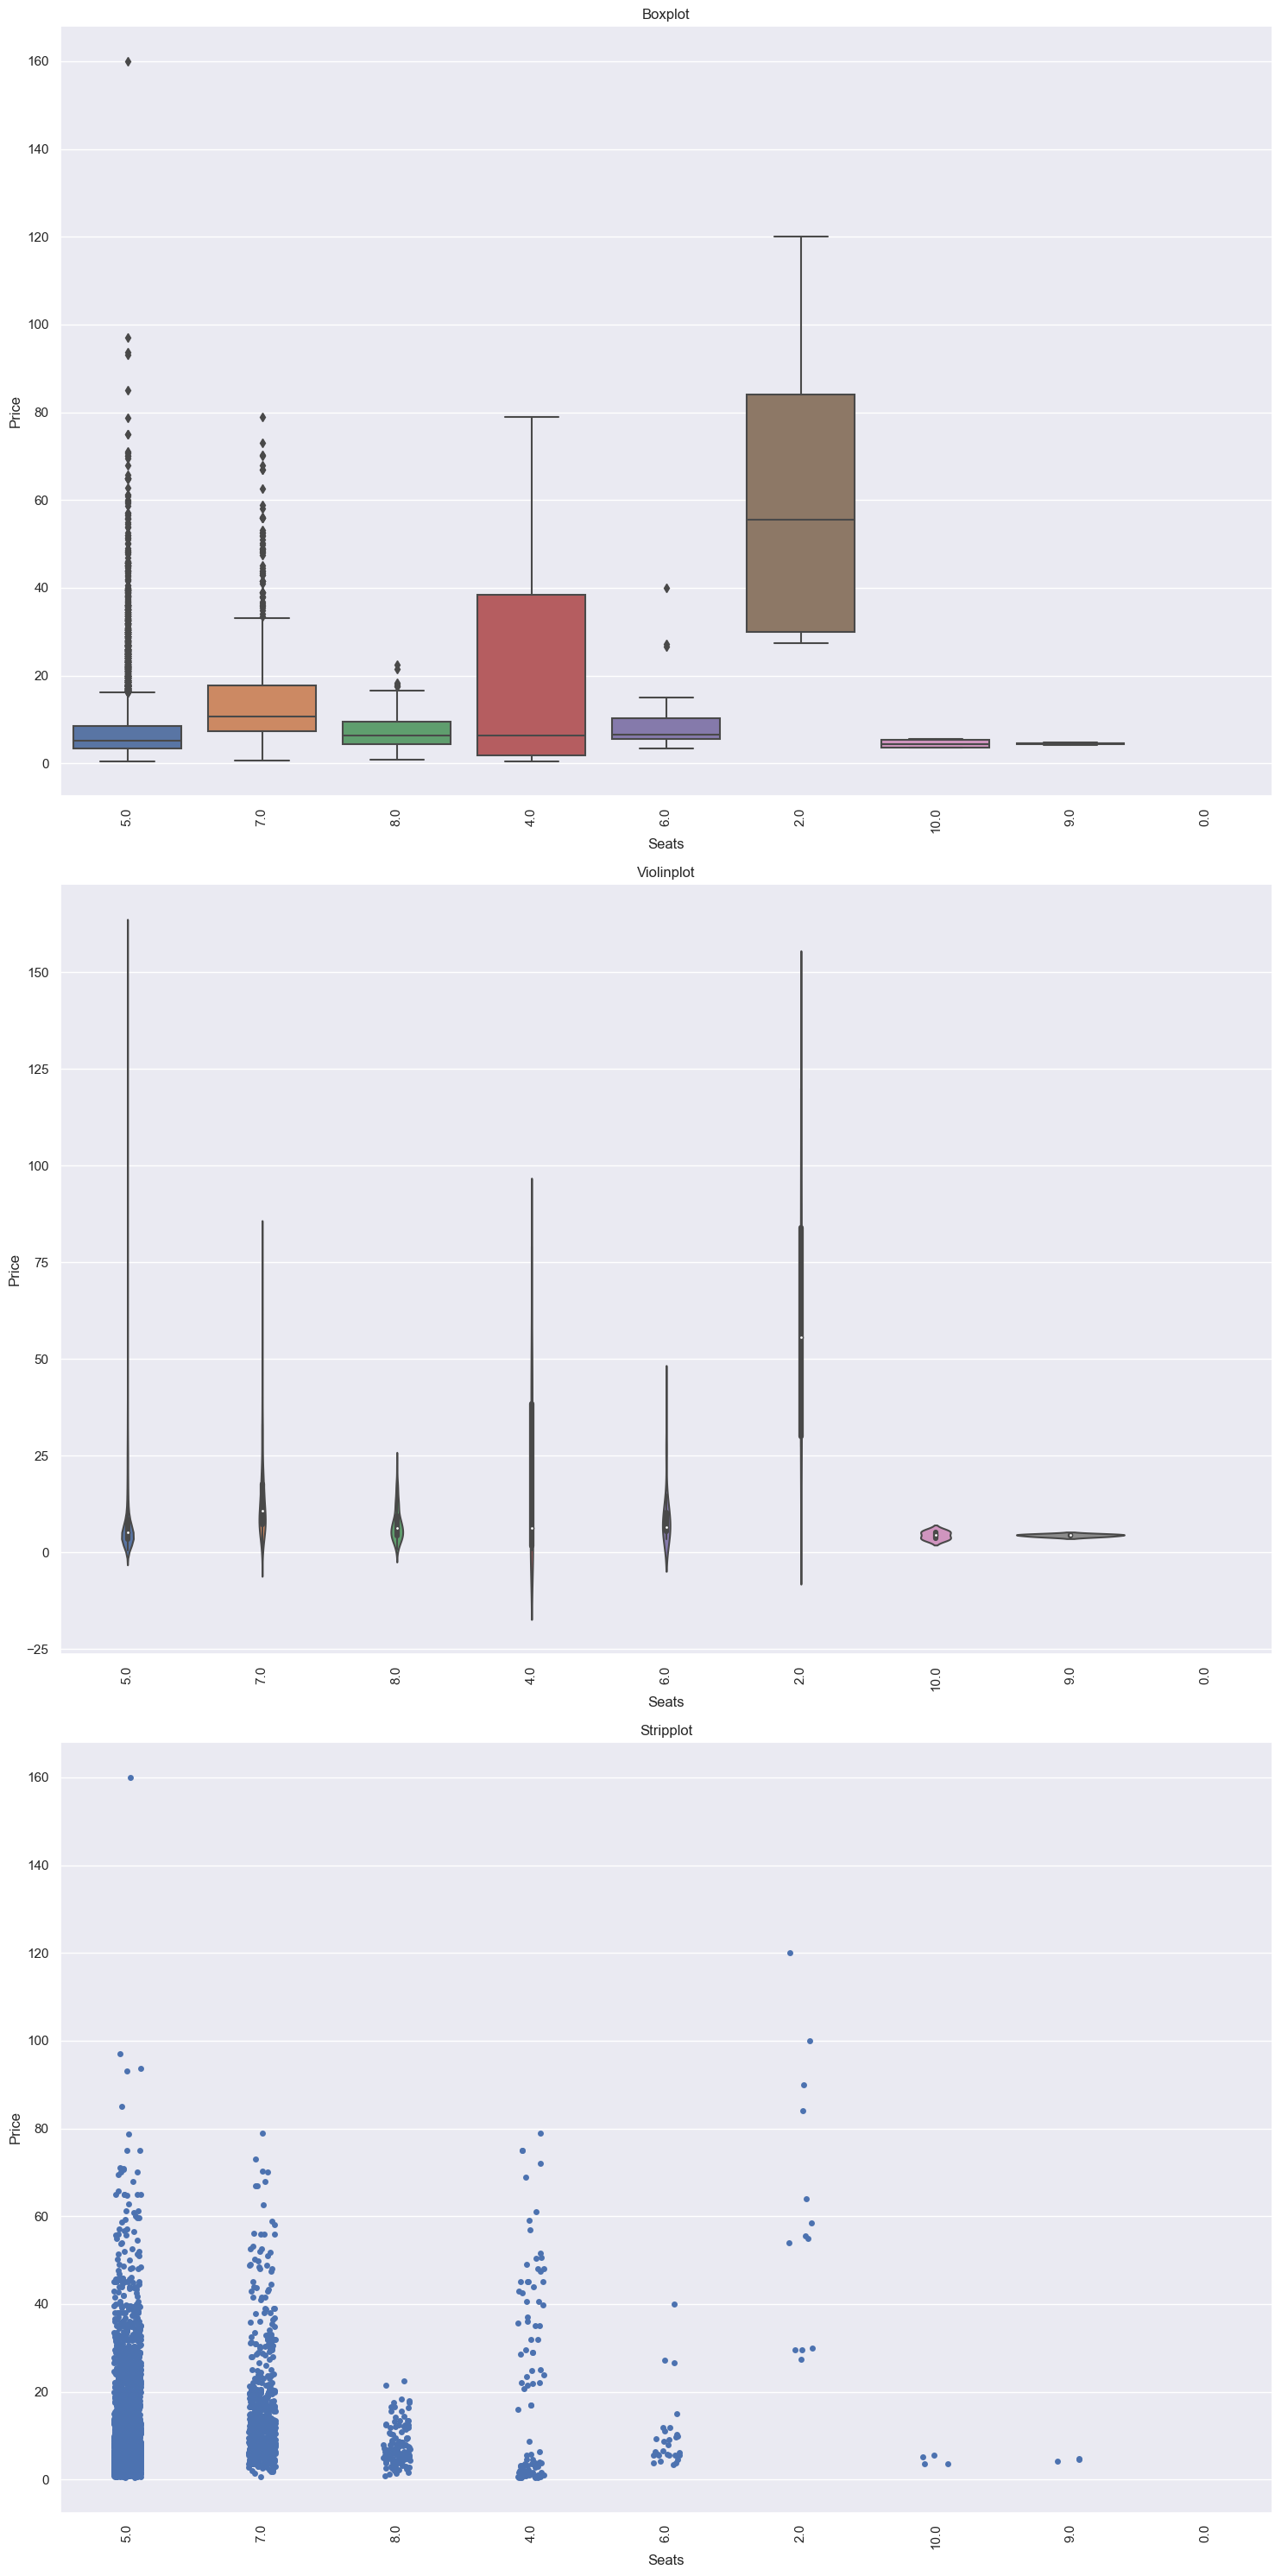

In [106]:
order = traindata1['Seats'].value_counts().index

plots = ["boxplot", "violinplot", "stripplot"]

plt.figure(figsize=(15, 30))

for i, k in enumerate(plots, 1):
    plt.subplot(3, 1, i)
    
    if k == "boxplot":
        sns.boxplot(x='Seats', y='Price', data=traindata1, order=order)
        plt.title('Boxplot')
    elif k == "violinplot":
        sns.violinplot(x='Seats', y='Price', data=traindata1, order=order)
        plt.title('Violinplot')
    elif k == "stripplot":
        sns.stripplot(x='Seats', y='Price', data=traindata1, order=order)
        plt.title('Stripplot')

    plt.xlabel('Seats')
    plt.ylabel('Price')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

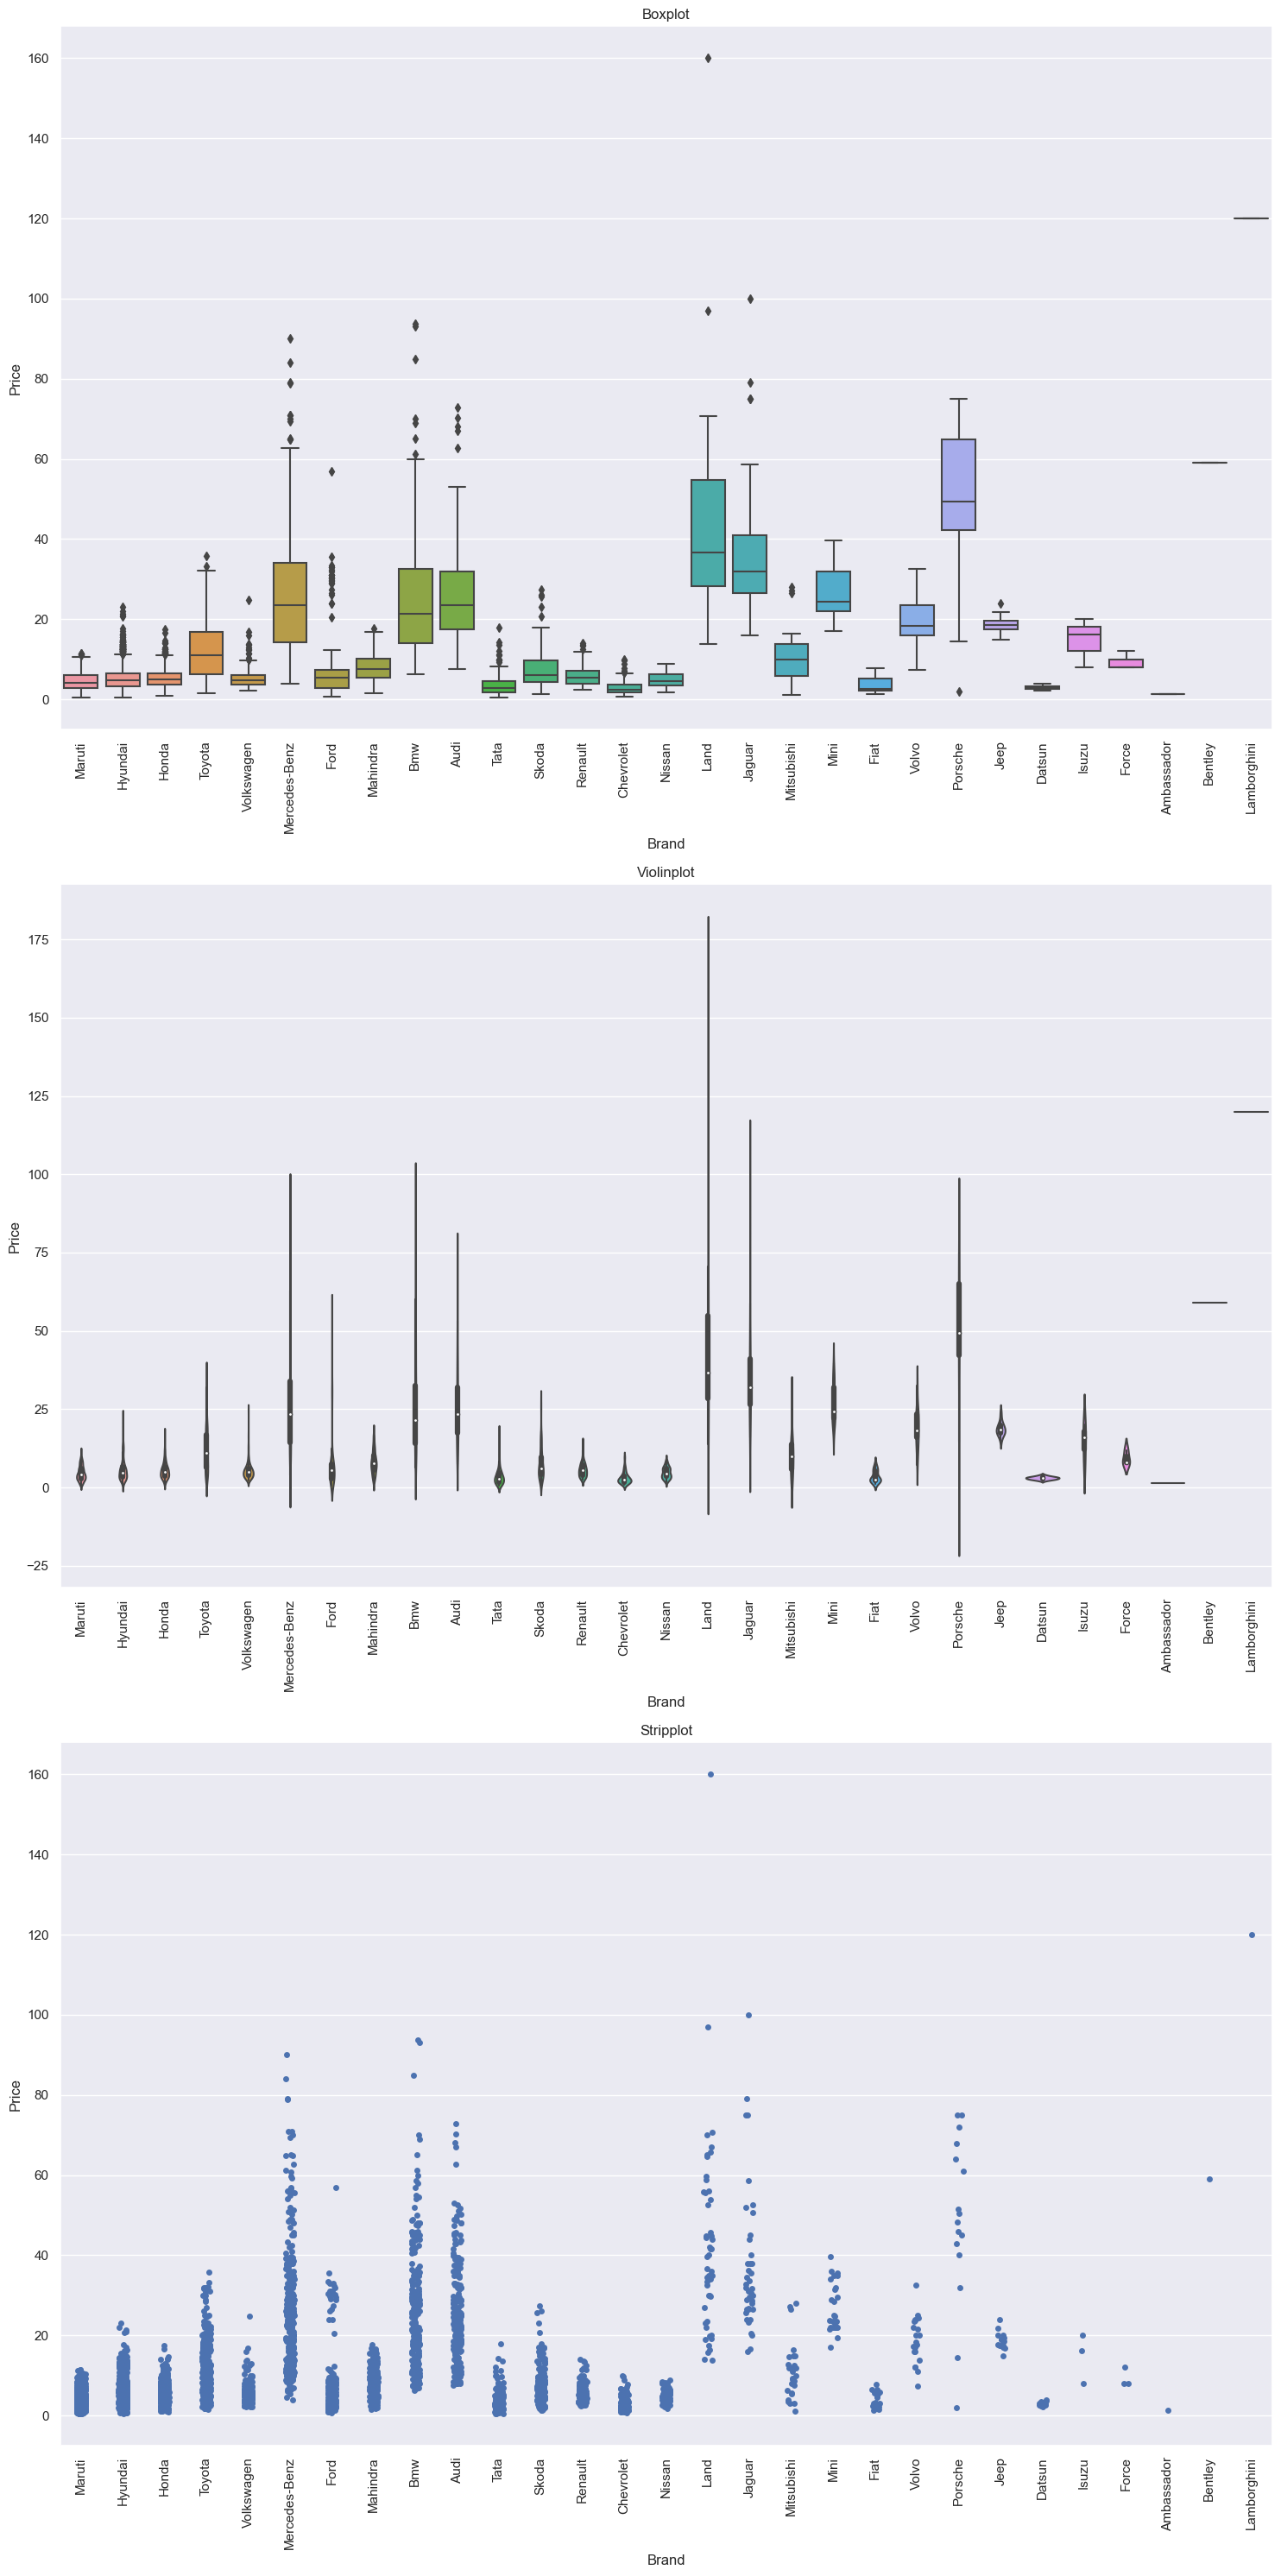

In [107]:
order = traindata1['Brand'].value_counts().index

plots = ["boxplot", "violinplot", "stripplot"]

plt.figure(figsize=(15, 30))

for i, k in enumerate(plots, 1):
    plt.subplot(3, 1, i)
    
    if k == "boxplot":
        sns.boxplot(x='Brand', y='Price', data=traindata1, order=order)
        plt.title('Boxplot')
    elif k == "violinplot":
        sns.violinplot(x='Brand', y='Price', data=traindata1, order=order)
        plt.title('Violinplot')
    elif k == "stripplot":
        sns.stripplot(x='Brand', y='Price', data=traindata1, order=order)
        plt.title('Stripplot')

    plt.xlabel('Brand')
    plt.ylabel('Price')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

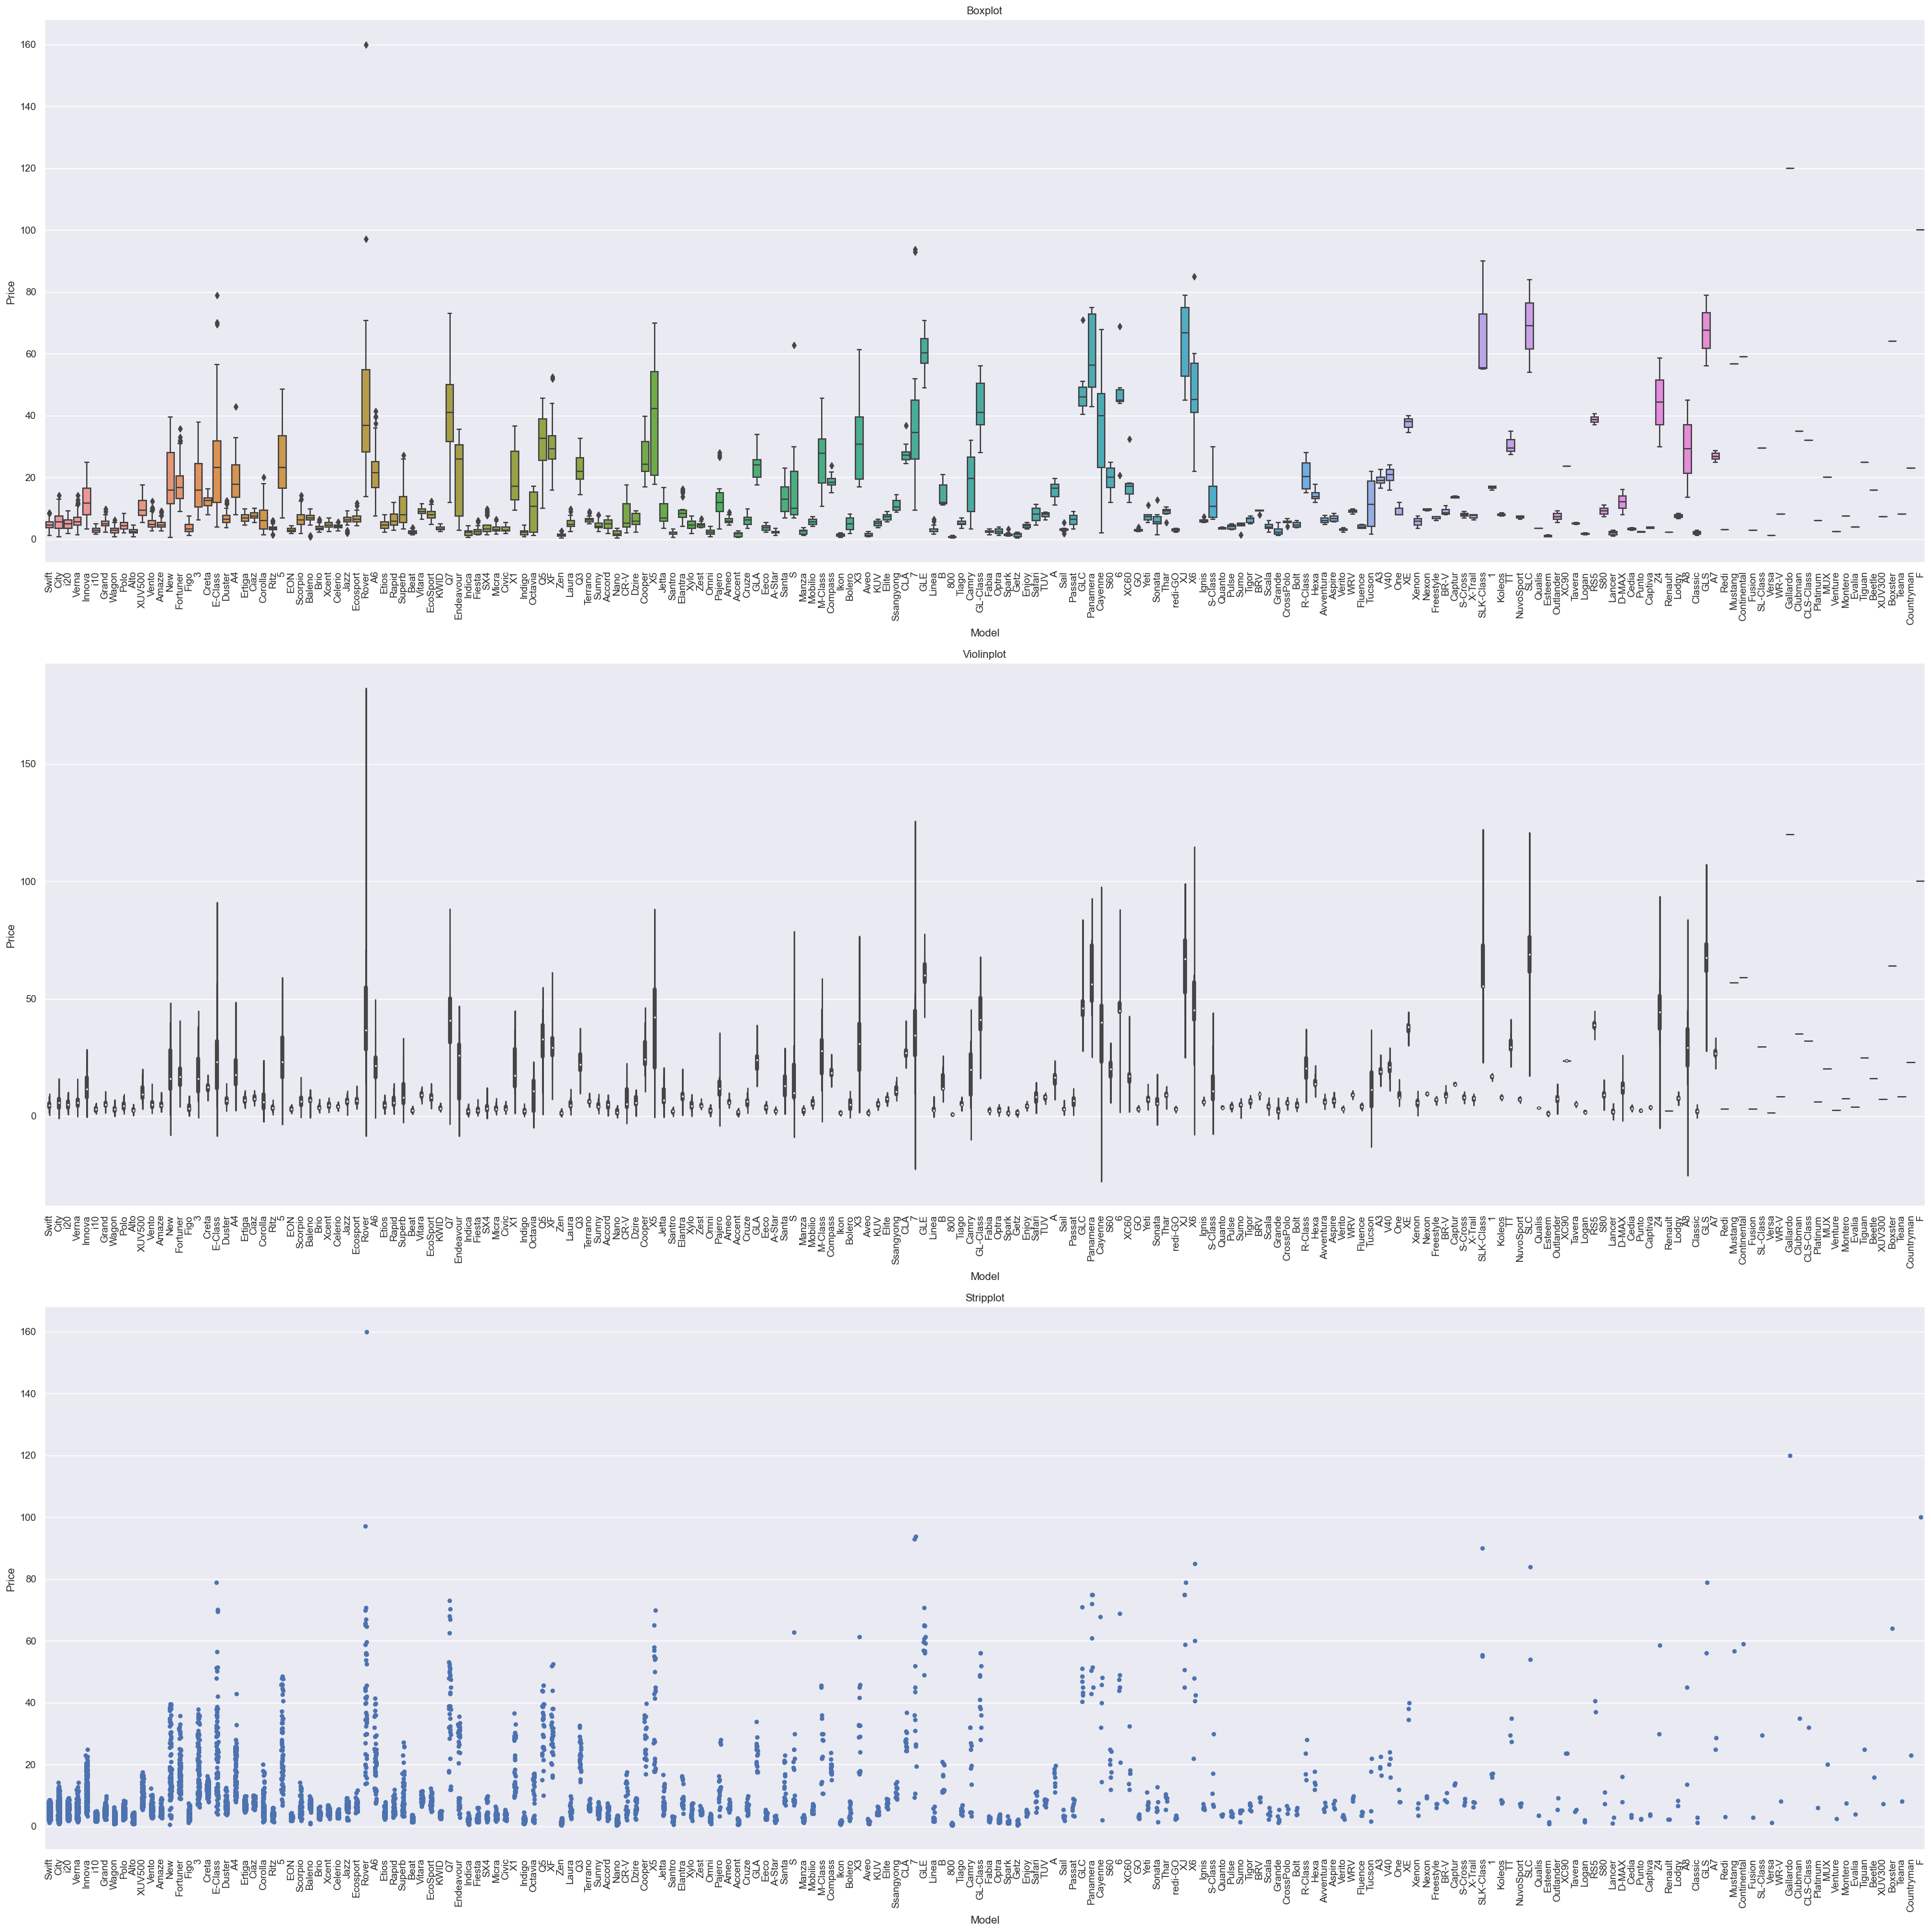

In [108]:
 order = traindata1['Model'].value_counts().index

plots = ["boxplot", "violinplot", "stripplot"]

plt.figure(figsize=(30, 30))

for i, k in enumerate(plots, 1):
    plt.subplot(3, 1, i)
    
    if k == "boxplot":
        sns.boxplot(x='Model', y='Price', data=traindata1, order=order)
        plt.title('Boxplot')
    elif k == "violinplot":
        sns.violinplot(x='Model', y='Price', data=traindata1, order=order)
        plt.title('Violinplot')
    elif k == "stripplot":
        sns.stripplot(x='Model', y='Price', data=traindata1, order=order)
        plt.title('Stripplot')

    plt.xlabel('Model')
    plt.ylabel('Price')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [109]:
numcol

Index(['Kilometers_Driven', 'Engine', 'Power', 'Price', 'New_Price',
       'Mileage'],
      dtype='object')

In [110]:
catcol

Index(['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats',
       'Brand', 'Model'],
      dtype='object')

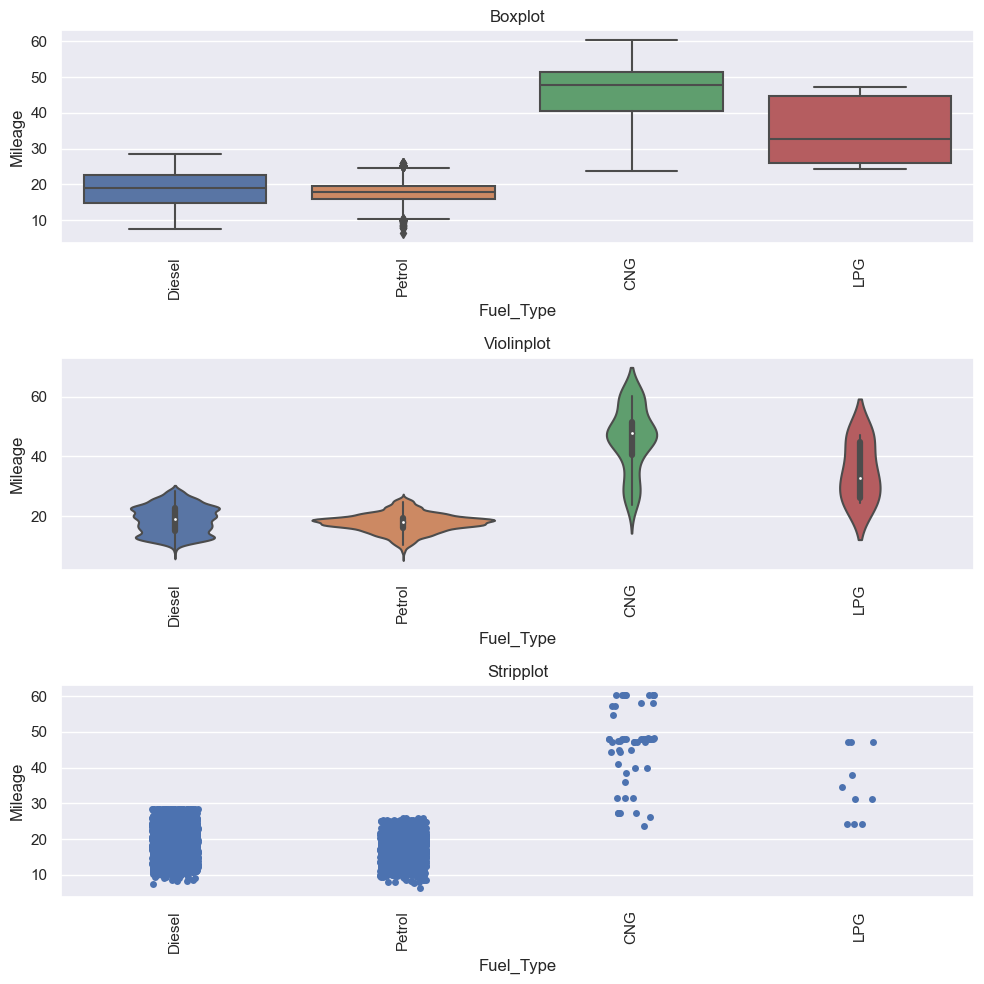

In [111]:
 order = traindata1['Fuel_Type'].value_counts().index

plots = ["boxplot", "violinplot", "stripplot"]

plt.figure(figsize=(10, 10))

for i, k in enumerate(plots, 1):
    plt.subplot(3, 1, i)
    
    if k == "boxplot":
        sns.boxplot(x='Fuel_Type', y='Mileage', data=traindata1, order=order)
        plt.title('Boxplot')
    elif k == "violinplot":
        sns.violinplot(x='Fuel_Type', y='Mileage', data=traindata1, order=order)
        plt.title('Violinplot')
    elif k == "stripplot":
        sns.stripplot(x='Fuel_Type', y='Mileage', data=traindata1, order=order)
        plt.title('Stripplot')

    plt.xlabel('Fuel_Type')
    plt.ylabel('Mileage')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [112]:
catcol

Index(['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats',
       'Brand', 'Model'],
      dtype='object')

In [113]:
numcol

Index(['Kilometers_Driven', 'Engine', 'Power', 'Price', 'New_Price',
       'Mileage'],
      dtype='object')

In [114]:
catcol.drop("Model")

Index(['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats',
       'Brand'],
      dtype='object')

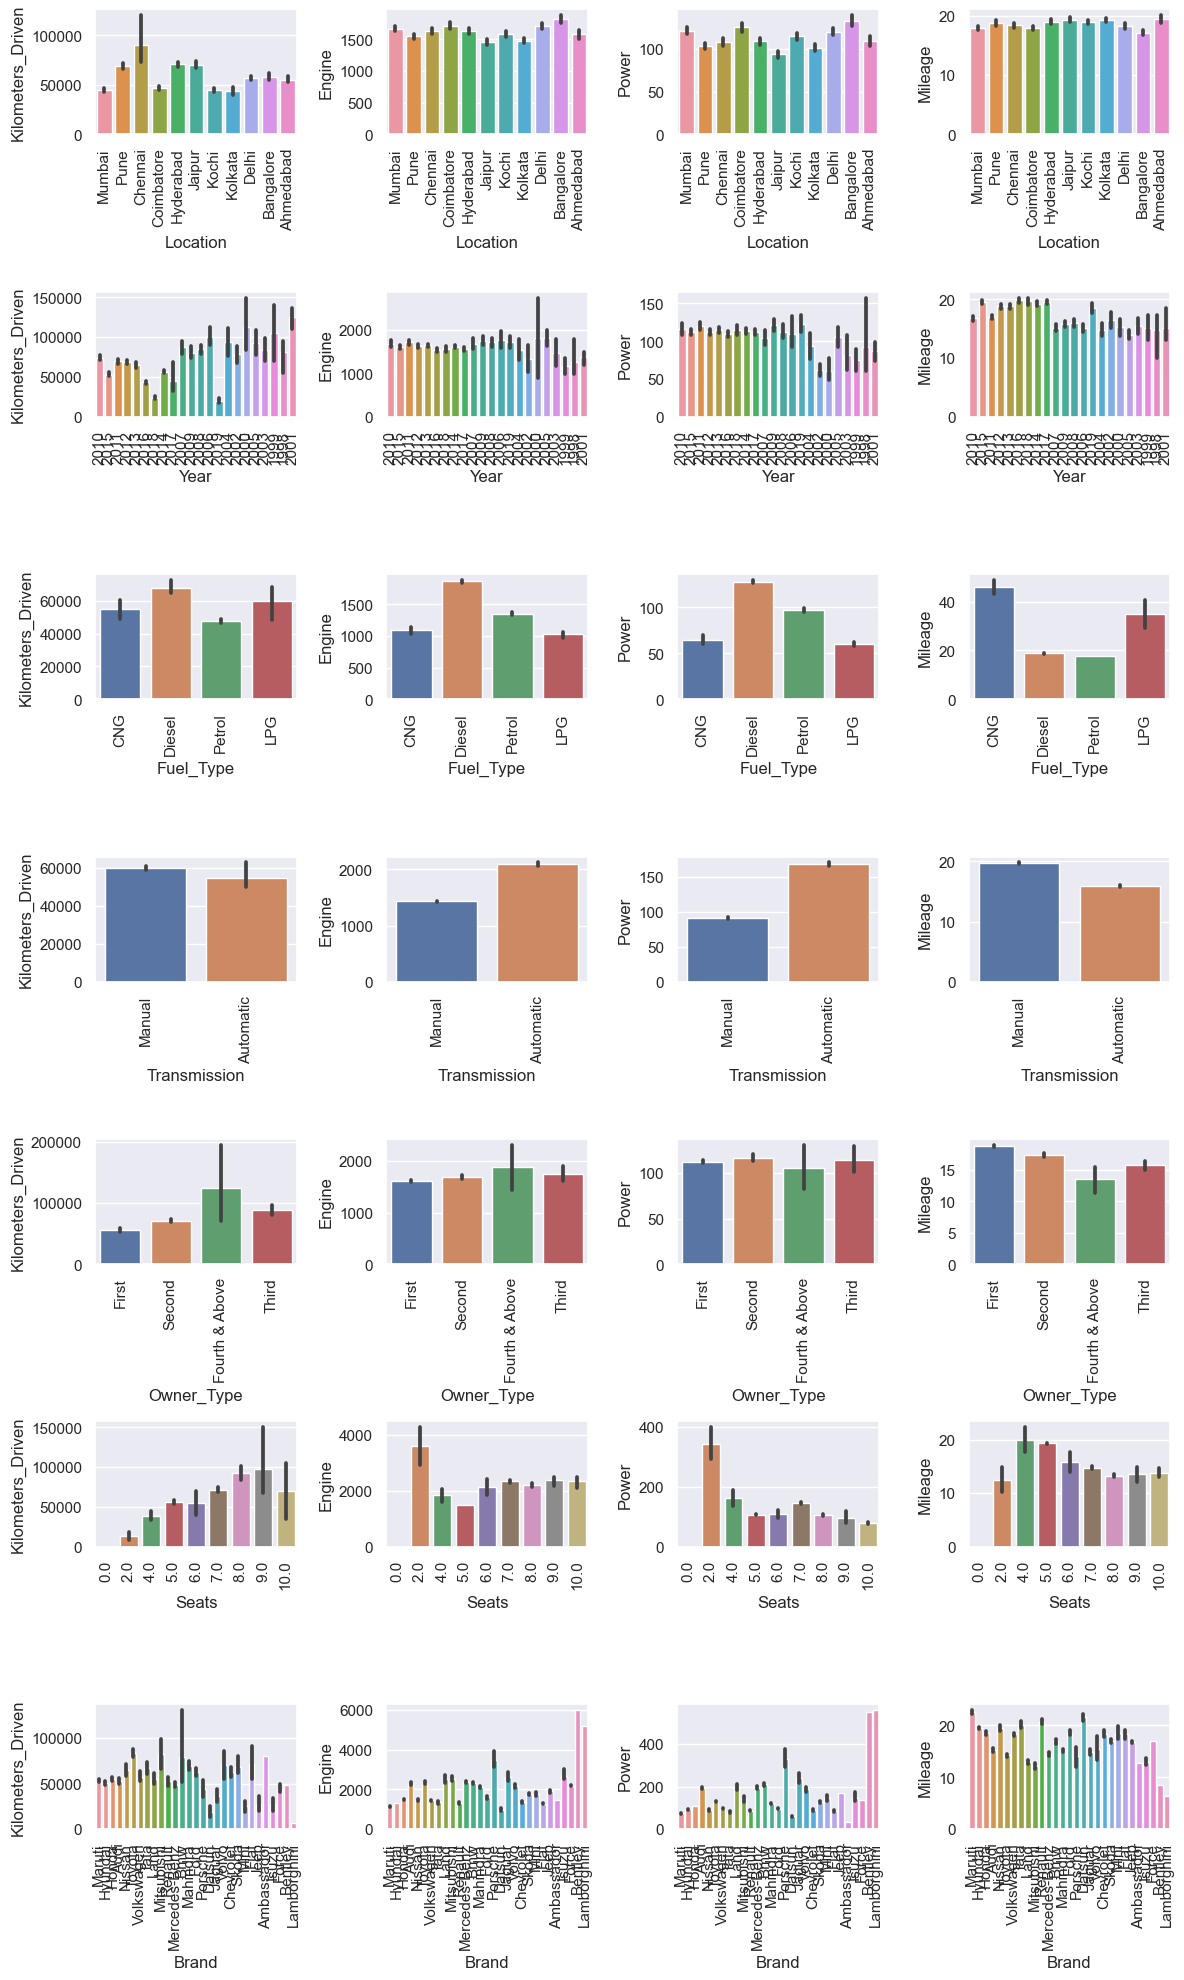

In [115]:
fig, axes = plt.subplots(7, 4, figsize=(12, 20))

for i, cat in enumerate(['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand']):
    for j, col in enumerate(['Kilometers_Driven', 'Engine', 'Power', 'Mileage']):
        sns.barplot(x=cat, y=col, data=traindata1, ax=axes[i, j])
        axes[i, j].set_xlabel(cat)
        axes[i, j].set_ylabel(col)
        axes[i, j].tick_params(axis='x', rotation=90)
        
plt.tight_layout()
plt.show()

<Axes: xlabel='Power', ylabel='Mileage'>

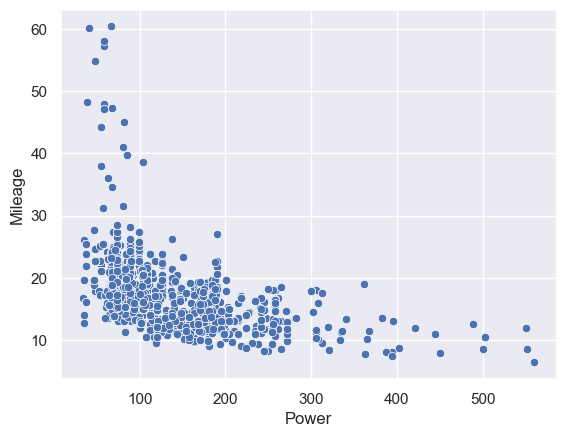

In [116]:
sns.scatterplot(x="Power", y="Mileage", data=traindata1)


<Axes: xlabel='Power', ylabel='Mileage'>

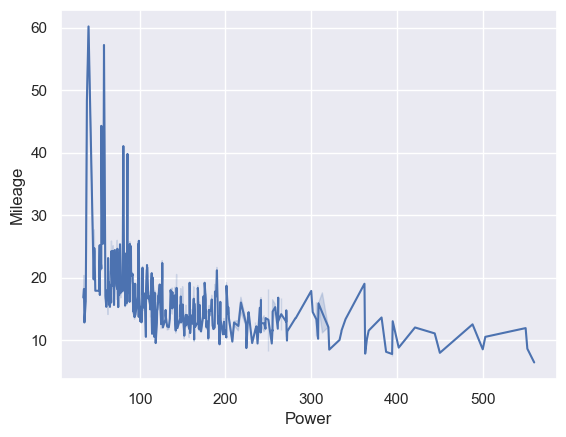

In [117]:
sns.lineplot(x="Power", y="Mileage", data=traindata1)

<Axes: xlabel='Power', ylabel='Mileage'>

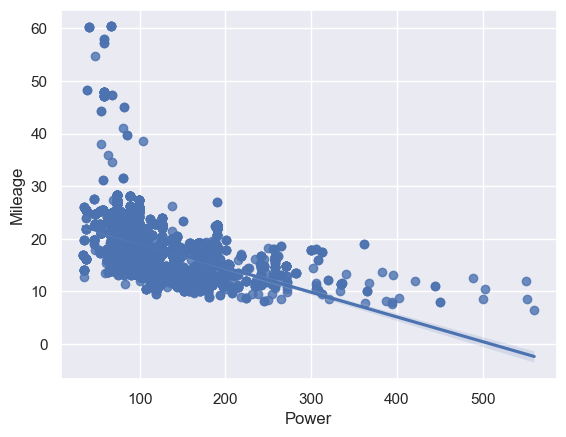

In [118]:
sns.regplot(x="Power", y="Mileage", data=traindata1)

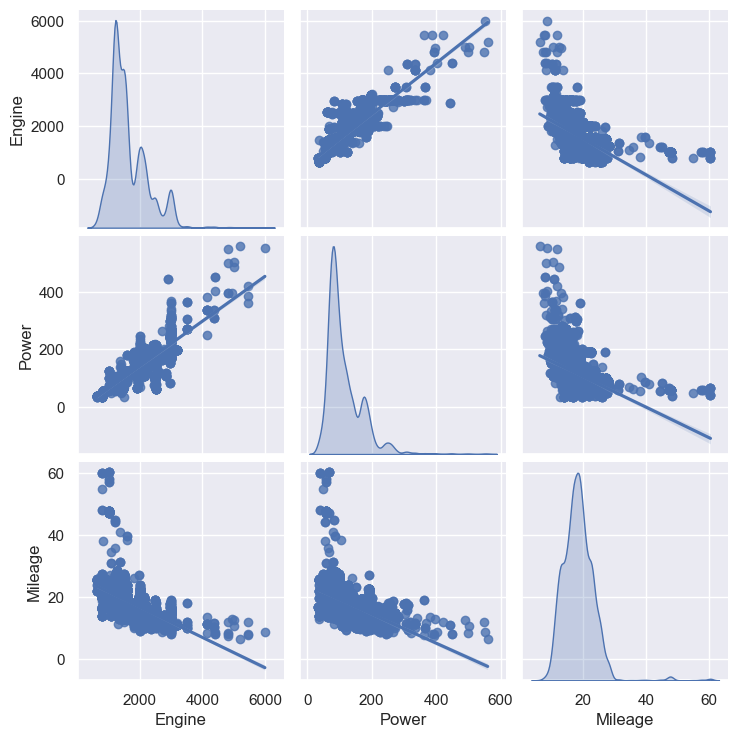

In [119]:
sns.set_style('darkgrid')
xx=['Engine', 'Power', 'Mileage']

sns.pairplot(data=traindata1[xx],kind='reg', diag_kind='kde')

# Multivariate Analysis

In [120]:
traindata1.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Engine', 'Power', 'Seats', 'Price', 'Brand', 'Model',
       'New_Price', 'Mileage'],
      dtype='object')

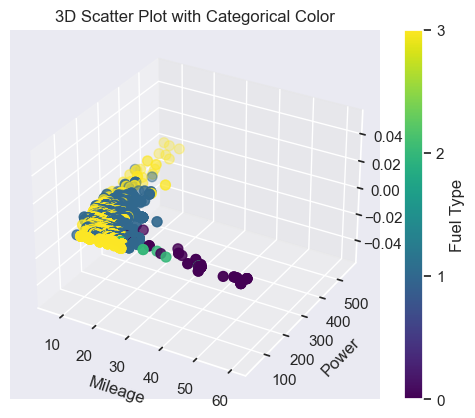

In [121]:
from mpl_toolkits.mplot3d import Axes3D

categories = traindata1['Fuel_Type'].astype('category').cat.codes

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(traindata1['Mileage'], traindata1['Power'], c=categories, cmap='viridis', s=50)


cbar = plt.colorbar(scatter, ticks=np.unique(categories))
cbar.set_label('Fuel Type')


ax.set_xlabel('Mileage')
ax.set_ylabel('Power')
ax.set_zlabel('Fuel Type')

plt.title('3D Scatter Plot with Categorical Color')
plt.show()


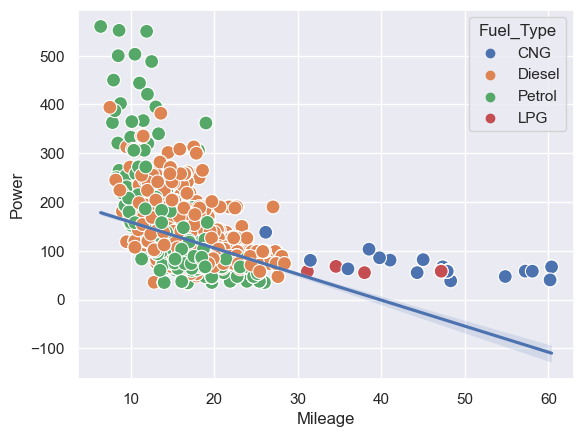

In [122]:
sns.scatterplot(x=traindata1['Mileage'], y=traindata1['Power'], hue=traindata1["Fuel_Type"], marker='o', edgecolor='w', s=100)


sns.regplot(x=traindata1['Mileage'], y=traindata1['Power'], scatter=False)


plt.show()


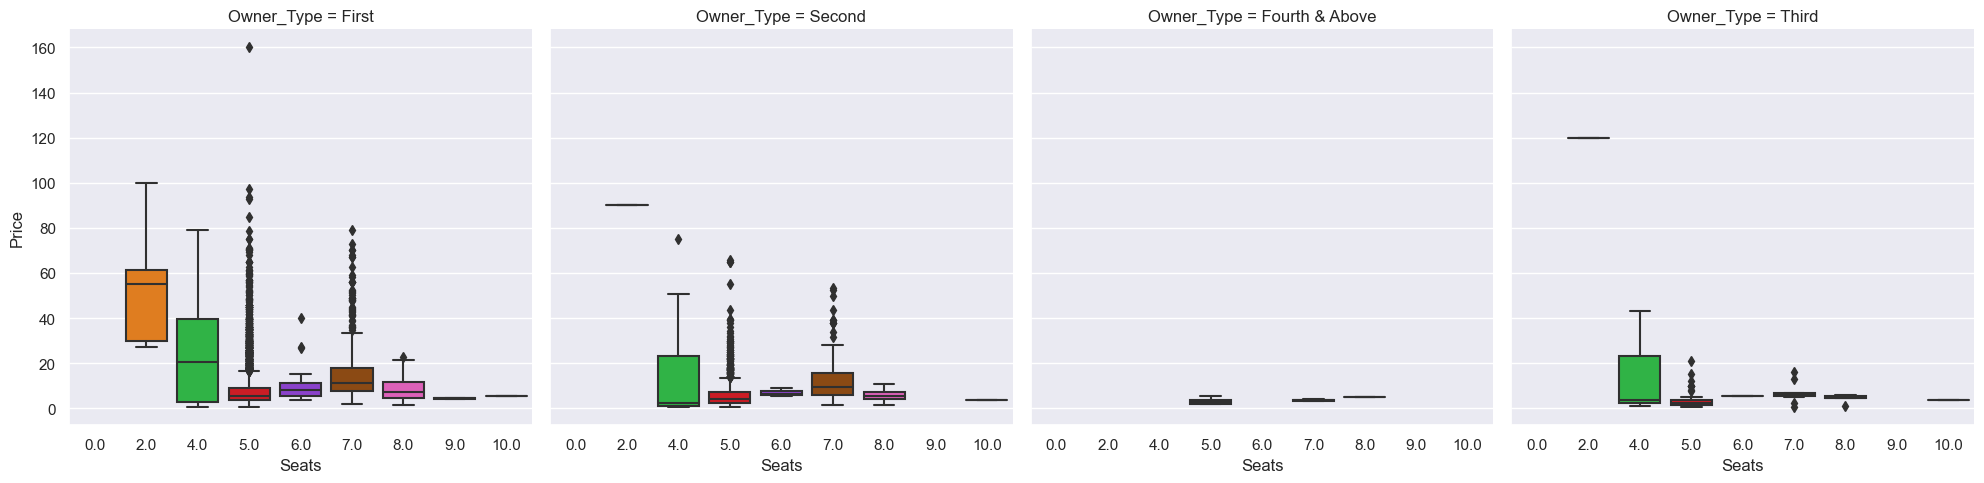

In [123]:
sns.catplot(x='Seats', y = 'Price', col='Owner_Type', col_wrap=4, data=traindata1,kind='box',ci=False,palette='bright', aspect=1)

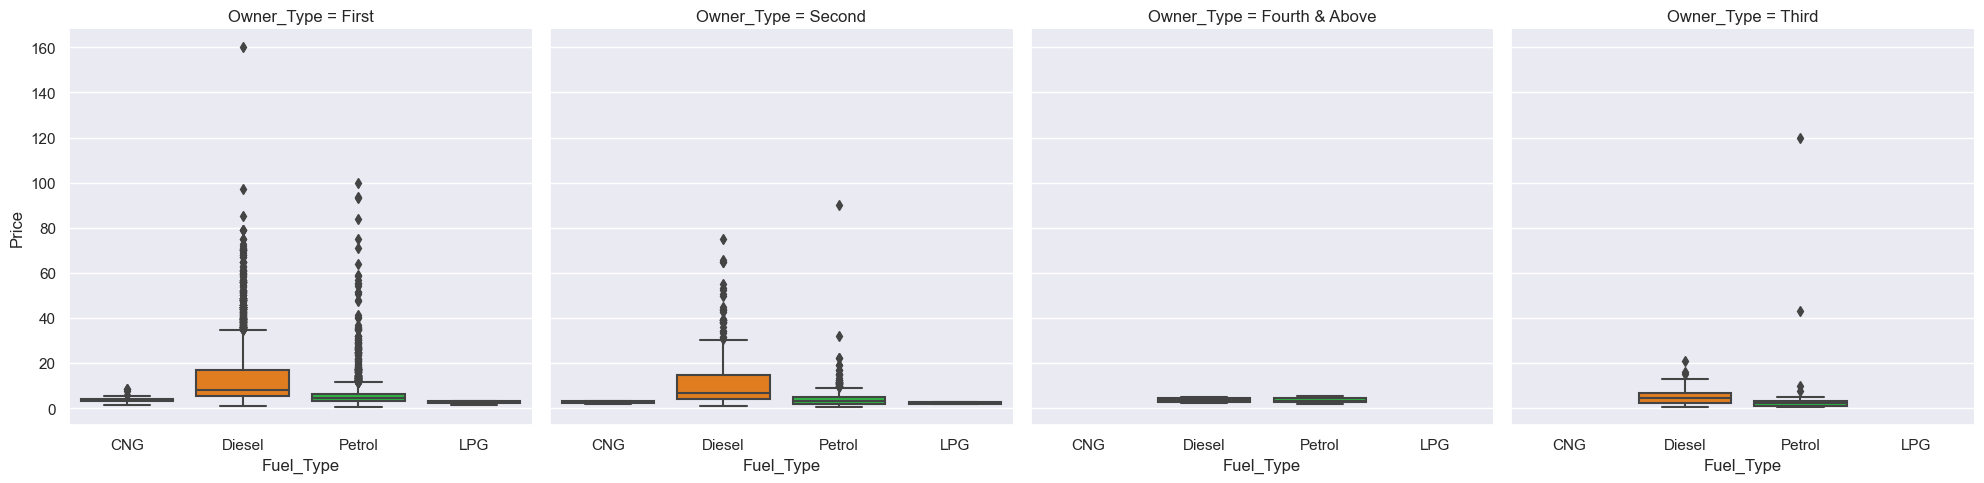

In [124]:
sns.catplot(x='Fuel_Type', y = 'Price', col='Owner_Type', col_wrap=4, data=traindata1,kind='box',ci=False,palette='bright', aspect=1)

Lets' treat outliers


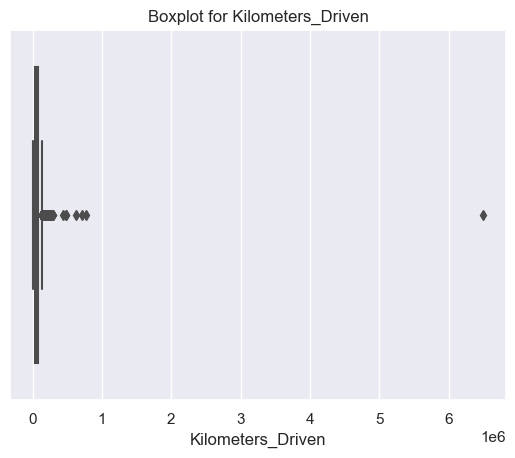

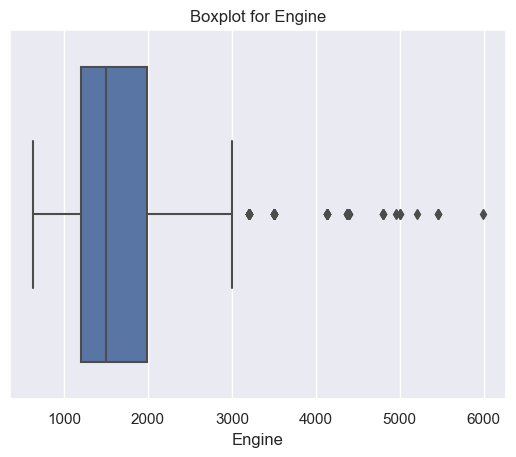

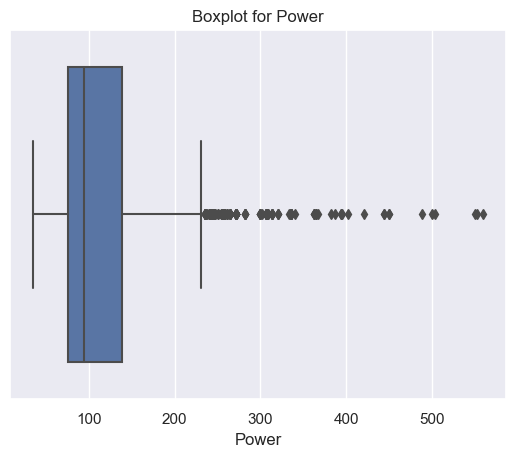

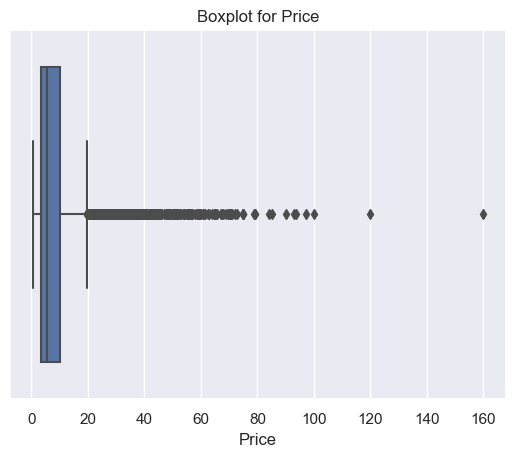

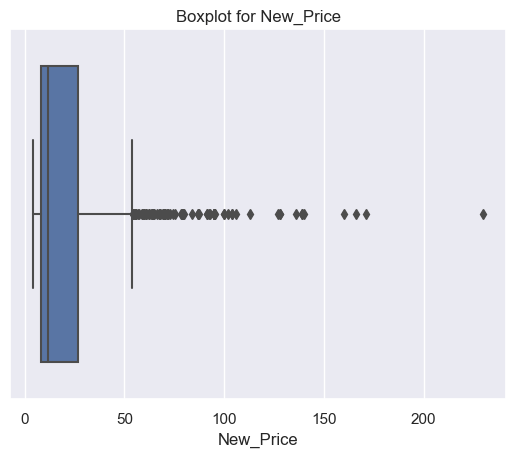

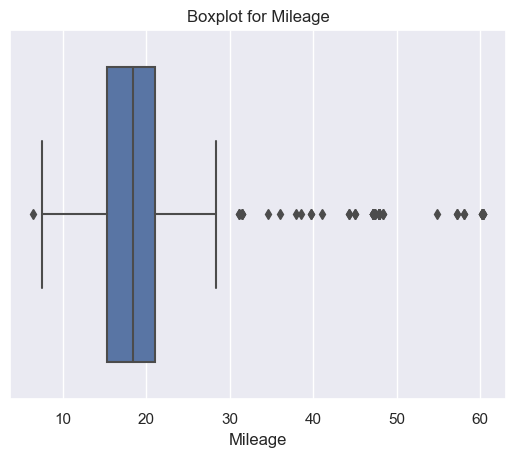

In [125]:
for i in numcol:
    sns.boxplot(x=traindata1[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [126]:
numcol

Index(['Kilometers_Driven', 'Engine', 'Power', 'Price', 'New_Price',
       'Mileage'],
      dtype='object')

In [127]:
traindata.Owner_Type.value_counts()

Owner_Type
First             4928
Second             968
Third              113
Fourth & Above       9
Name: count, dtype: int64

In [128]:
def outlier_check(data, n):
  for col in data.columns:
    if data[col].dtype == 'int64' or data[col].dtype=='float64' :
      Q1 = data[col].quantile(0.25)
      Q3 = data[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_range = Q1 - (n * IQR)
      upper_range = Q3 + (n * IQR)
      #print(f"{style.BOLD}{col}{style.END}")
      print(f"Number of outliers in '{col}' : {data[(data[col] > upper_range) | (data[col] < lower_range)].shape[0]}")
      #print("Percentage of outliers :{0:10.3f}".format(((data[data[col]> upper_range) | (data[col] < lower_range)].shape[0])/data.shape[0])*100), "%\n")


In [129]:
outlier_check(traindata1, 1.5)

Number of outliers in 'Kilometers_Driven' : 198
Number of outliers in 'Engine' : 56
Number of outliers in 'Power' : 235
Number of outliers in 'Price' : 698
Number of outliers in 'New_Price' : 89
Number of outliers in 'Mileage' : 56


In [130]:
def remove_outlier(col):
  sorted(col)
  Q1, Q3 = np.percentile(col,[25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5*IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range, upper_range

In [131]:
for column in traindata1.drop(['Price','Seats'], axis=1).columns:
    if traindata1[column].dtype !='object':
        lr, ur = remove_outlier(traindata1[column])
        traindata1[column] = np.where(traindata1[column] > ur, ur, traindata1[column])
        traindata1[column] = np.where(traindata1[column] < lr, lr, traindata1[column])

In [132]:
outlier_check(traindata1, 1.5)

Number of outliers in 'Kilometers_Driven' : 0
Number of outliers in 'Engine' : 0
Number of outliers in 'Power' : 0
Number of outliers in 'Price' : 698
Number of outliers in 'New_Price' : 89
Number of outliers in 'Mileage' : 0


In [133]:
traindata1.drop(columns="New_Price", axis=1, inplace=True)

In [134]:
traindata1.head(2)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Brand,Model,Mileage
0,Mumbai,2010,72000.0,CNG,Manual,First,998.0,58.16,5.0,1.75,Maruti,Wagon,29.80
1,Pune,2015,41000.0,Diesel,Manual,First,1582.0,126.20,5.0,12.50,Hyundai,Creta,19.67


In [135]:
traindata1.drop(columns="Power", axis=1, inplace=True)

In [136]:
data1=traindata1.copy()

In [137]:
data1.head(2)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,Price,Brand,Model,Mileage
0,Mumbai,2010,72000.0,CNG,Manual,First,998.0,5.0,1.75,Maruti,Wagon,29.80
1,Pune,2015,41000.0,Diesel,Manual,First,1582.0,5.0,12.50,Hyundai,Creta,19.67


In [138]:
tdata = pd.get_dummies(data1, columns=['Location','Fuel_Type','Transmission','Owner_Type','Seats','Brand','Model'], drop_first=True)

In [141]:
tdata.head(2)

,Year,Kilometers_Driven,Engine,Price,Mileage,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Model_Xcent,Model_Xenon,Model_Xylo,Model_Yeti,Model_Z4,Model_Zen,Model_Zest,Model_i10,Model_i20,Model_redi-GO
0,2010,72000.0,998.0,1.75,29.80,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2015,41000.0,1582.0,12.50,19.67,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [144]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5844 entries, 0 to 6018
Columns: 259 entries, Year to Model_redi-GO
dtypes: bool(254), float64(4), object(1)
memory usage: 1.8+ MB


Now Let's check it with few models

In [145]:
x=tdata.drop(["Price"], axis=1)
y=tdata["Price"]

In [150]:
 from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=35)

In [153]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

ypredicttest=lr.predict(x_test)
ypredicttrain=lr.predict(x_train)


In [162]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mat = ["mean_squared_error", "mean_absolute_error", "r2_score"]

for metric in mat:
    metric_function = globals()[metric]
    
    train_metric = metric_function(y_train, ypredicttrain)
    test_metric = metric_function(y_test, ypredicttest)
    
    print(f"For training data: {metric} is {train_metric}")
    print(f"For testing data: {metric} is {test_metric}\n")


For training data: mean_squared_error is 18.857427577525133
For testing data: mean_squared_error is 19.488504687392847

For training data: mean_absolute_error is 2.3151953978698563
For testing data: mean_absolute_error is 2.5692421084426553

For training data: r2_score is 0.8521507842073854
For testing data: r2_score is 0.8312279684110304



In [165]:
lr.intercept_

-1992.839038131879

In [189]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=["Co-effcient"])
coeff

,Co-effcient
Year,0.995838
Kilometers_Driven,-0.000038
Engine,0.003461
Mileage,-0.049404
Location_Bangalore,2.552999
...,...
Model_Zen,1.633411
Model_Zest,-7.909048
Model_i10,2.292049
Model_i20,1.121867


In [190]:
traindata1.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Engine', 'Seats', 'Price', 'Brand', 'Model', 'Mileage'],
      dtype='object')

In [198]:
selected_rows = coeff.loc[["Year", 'Kilometers_Driven', 'Engine','Mileage']]
